# DETECTION OF AUTISM IN TODDLERS USING MACHINE LEARNING

#### IMPORTING LIBRARY

In [1]:
# import the necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
from sklearn.cluster import KMeans
from scipy.stats import norm

warnings.filterwarnings("ignore")

In [2]:
# Read the csv file
data = pd.read_csv("/content/Qchat_Full_Polish_Cleaned.csv")

In [3]:
# Displaying part of the data
data.head()

child_ID  sex  age  group  asd_risk  sum_qchat  Q01  Q02  Q03  Q04  ...  \
0      288    1   24      1         1         37    2    2    1    0  ...   
1  FS/2510    2   23      1         1         37    2    1    0    4  ...   
2      220    1   18      1         1         45    2    3    4    2  ...   
3  FS/2762    1   20      1         1         52    4    2    0    4  ...   
4      238    2   19      1         1         39    1    2    1    1  ...   

   Q16  Q17  Q18  Q19  Q20  Q21  Q22  Q23  Q24  Q25  
0    1    4    1    4    4    0    0    0    0    3  
1    0    4    0    1    0    2    0    0    0    0  
2    2    3    2    2    0    0    0    0    0    0  
3    3    1    0    2    0    2    0    2    1    2  
4    3    4    2    2    1    0    1    3    0    2  

[5 rows x 31 columns]

### LABEL REPRESENTATION

In the above risk column, 1 represents Yes and 2 represents No.

## DATA DESCRIPTION

The dataset columns consists of the q1-q25 and some personal information on the individuals/toddlers. The q1-q25 representation is described below:
- q1: Does your child look at you when you call his/her name?
- q2: How easy is it for you to get eye contact with your
child?
- q3: When your child is playing alone, does s/he line objects
up?
- q4: Can other people easily understand your child’s speech?
- q5: Does your child point to indicate that s/he wants
something (e.g. a toy that is out of reach)?
- q6: Does your child point to share interest with you (e.g.
pointing at an interesting sight)?
- q7: How long can your child’s interest be maintained by a spinning object
(e.g. washing machine, electric fan, toy car wheels)?
- q8: How many words can your child say?
- q9: Does your child pretend (e.g. care for dolls, talk on a toy
phone)?
- q10: Does your child follow where you’re looking?
- q11: . How often does your child sniff or lick unusual
objects?
- q12: Does your child place your hand on an object when s/he
wants you to use it (e.g. on a door handle when s/he wants you to
open the door, on a toy when s/he wants you to activate it)?
- q13: Does your child walk on tiptoe?
- q14: How easy is it for your child to adapt when his/her
routine changes or when things are out of their usual
place?
- q15: If you or someone else in the family is visibly upset, does
your child show signs of wanting to comfort them
(e.g. stroking their hair, hugging them)?
- q16: Does your child do the same thing over and
over again (e.g. running the tap, turning the light
switch on and off, opening and closing doors)?
- q17: Would you describe your child’s first words
as:
- q18: Does your child echo things s/he hears (e.g. things
that you say, lines from songs or movies, sounds)?
- q19: Does your child use simple gestures (e.g. wave goodbye)?
- q20: Does your child make unusual finger movements near his/her eyes?
- q21:  Does your child spontaneously look at your face to
check your reaction when faced with something
unfamiliar?
- q22: How long can your child’s interest be maintained by
just one or two objects?
- q23: Does your child twiddle objects
repetitively (e.g. pieces of string)?
- q24: Does your child seem oversensitive to noise?
- q25: Does your child stare at nothing with no apparent
purpose?

### EXPLORATORY DATA ANALYSIS

In [3]:
# Data dimension
data.shape

(1016, 31)

In [4]:
# Dataset information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1016 entries, 0 to 1015
Data columns (total 31 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   child_ID   1016 non-null   object
 1   sex        1016 non-null   int64 
 2   age        1016 non-null   int64 
 3   group      1016 non-null   int64 
 4   asd_risk   1016 non-null   int64 
 5   sum_qchat  1016 non-null   int64 
 6   Q01        1016 non-null   int64 
 7   Q02        1016 non-null   int64 
 8   Q03        1016 non-null   int64 
 9   Q04        1016 non-null   int64 
 10  Q05        1016 non-null   int64 
 11  Q06        1016 non-null   int64 
 12  Q07        1016 non-null   int64 
 13  Q08        1016 non-null   int64 
 14  Q09        1016 non-null   int64 
 15  Q10        1016 non-null   int64 
 16  Q11        1016 non-null   int64 
 17  Q12        1016 non-null   int64 
 18  Q13        1016 non-null   int64 
 19  Q14        1016 non-null   int64 
 20  Q15        1016 non-null   int

In [ ]:
# checking the unique values of the asd column
data["asd_risk"].unique()

array([1, 2], dtype=int64)

In [ ]:
# checking the unique values of the asd column
data["Q01"].unique()

array([2, 4, 1, 3, 0], dtype=int64)

In [ ]:
# checking the unique values of the sex column
data["sex"].unique()

array([1, 2], dtype=int64)

In [ ]:
# checking the unique values of the group column
data["group"].unique()

array([1, 2, 3, 4], dtype=int64)

In [ ]:
# checking the unique values of the sum of qchat column
data["sum_qchat"].unique()

array([37, 45, 52, 39, 48, 32, 46, 29, 38, 35, 40, 67, 49, 41, 26, 27, 33,
        9, 13, 34, 66, 31, 25, 42, 65, 44, 56, 58, 19, 36, 53, 51, 30, 17,
       80, 76, 20, 24, 59, 21, 43, 23, 70, 64, 14, 22, 57, 55, 72, 28, 47,
       54, 50, 69, 63, 74, 18,  8, 60, 16, 12, 62, 11, 15,  6,  7, 10,  5,
        1,  0], dtype=int64)

In [ ]:
# checking the statistical values of each column
data.describe()

sex          age        group     asd_risk    sum_qchat  \
count  1016.000000  1016.000000  1016.000000  1016.000000  1016.000000   
mean      1.409449    24.984252     3.011811     1.065945    32.265748   
std       0.491974     5.080218     1.273395     0.248308    12.136670   
min       1.000000    16.000000     1.000000     1.000000     0.000000   
25%       1.000000    21.000000     2.000000     1.000000    24.000000   
50%       1.000000    24.000000     4.000000     1.000000    31.000000   
75%       2.000000    29.000000     4.000000     1.000000    40.000000   
max       2.000000    36.000000     4.000000     2.000000    80.000000   

               Q01          Q02          Q03          Q04          Q05  ...  \
count  1016.000000  1016.000000  1016.000000  1016.000000  1016.000000  ...   
mean      1.021654     0.856299     1.898622     1.640748     1.083661  ...   
std       0.888639     0.820321     1.350992     1.382463     1.273407  ...   
min       0.000000     0.000000     0.000000     0.000000     0.000000  ...   
25%       0.000000     0.000000     1.000000     1.000000     0.000000  ...   
50%       1.000000     1.000000     2.000000     1.000000     1.000000  ...   
75%       1.000000     1.000000     3.000000     3.000000     2.000000  ...   
max       4.000000     4.000000     4.000000     4.000000     4.000000  ...   

               Q16          Q17          Q18          Q19          Q20  \
count  1016.000000  1016.000000  1016.000000  1016.000000  1016.000000   
mean      1.662402     1.395669     1.500984     1.215551     0.987205   
std       1.356322     1.426333     1.307048     1.313737     1.316374   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000     0.000000   
50%       2.000000     1.000000     1.000000     1.000000     0.000000   
75%       3.000000     3.000000     2.000000     2.000000     2.000000   
max       4.000000     4.000000     4.000000     4.000000     4.000000   

               Q21          Q22          Q23          Q24          Q25  
count  1016.000000  1016.000000  1016.000000  1016.000000  1016.000000  
mean      1.105315     1.186024     1.108268     1.136811     0.769685  
std       1.128114     1.031447     1.253209     1.031515     1.059838  
min       0.000000     0.000000     0.000000     0.000000     0.000000  
25%       0.000000     0.000000     0.000000     0.000000     0.000000  
50%       1.000000     1.000000     1.000000     1.000000     0.000000  
75%       2.000000     2.000000     2.000000     2.000000     1.000000  
max       4.000000     4.000000     4.000000     4.000000     4.000000  

[8 rows x 30 columns]

### CORRELATION MATRIX

A correlationmatrix is a table showing correlation between variables. Each cell in the table shows the correlation between two variables and is usually between -1 and 1.

#### CORRELATION HEATMAP OF ENTIRE DATA

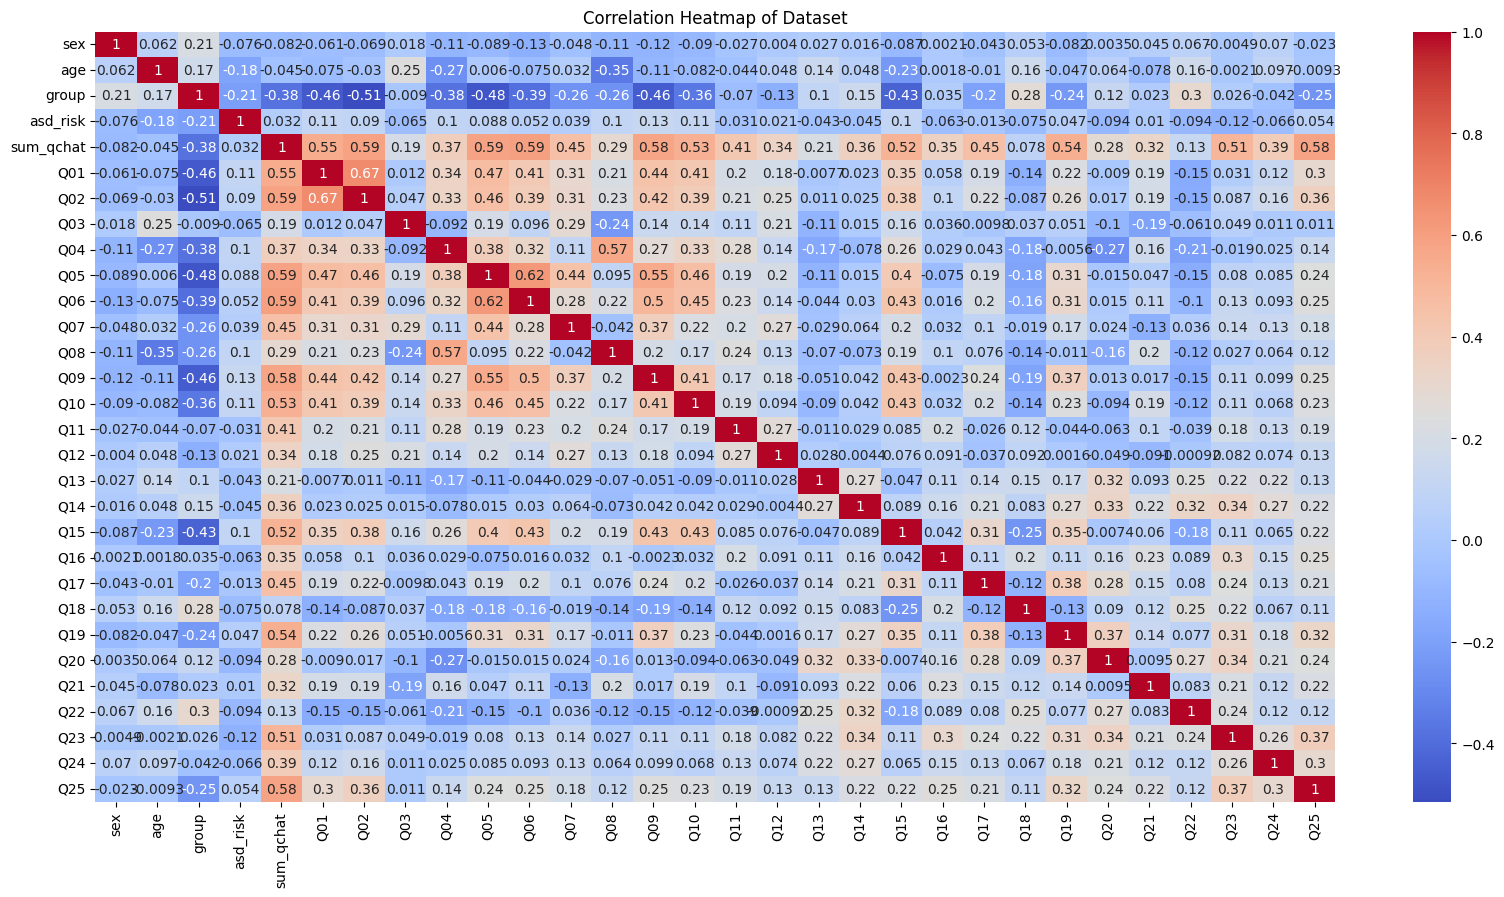

In [ ]:
# creating a heat map to show the relationship and correlation between the columns
plt.figure(figsize=(20, 10))
sns.heatmap(data.corr(numeric_only=True), annot=True, cmap="coolwarm")

plt.title("Correlation Heatmap of Dataset", weight = "bold")
plt.show()

The heatmap shows the strength and direction of the relationships between the columns. Each cell in the matrix represents the correlation coefficient between two variables, with colors indicating the magnitude and direction of the correlation. The red color indicate how strongly correlated the columns are, while blue represent how negative correlated they are.

Heatmaps help quickly identify patterns, trends, and potential outliers in the data, making them valuable for exploratory data analysis and for presenting complex relationships in an easily interpretable visual format.


- From the correlation matrix, the Q22 and Q25 chat has more correlation to the asd risk positively with scores 0.3 and 0.25 respectively.
- Talking about the correlation between the chats which led to the determination of the spectrum, Q2 and Q1, Q5 and Q1, Q5 and Q2, Q6 and Q5 has scores 0.67, 0.47, 0.46 and 0.62 respectively so its safe to say they contribute to ASD more.

## Displaying the lower half of the heatmap while maintaining the correlating values

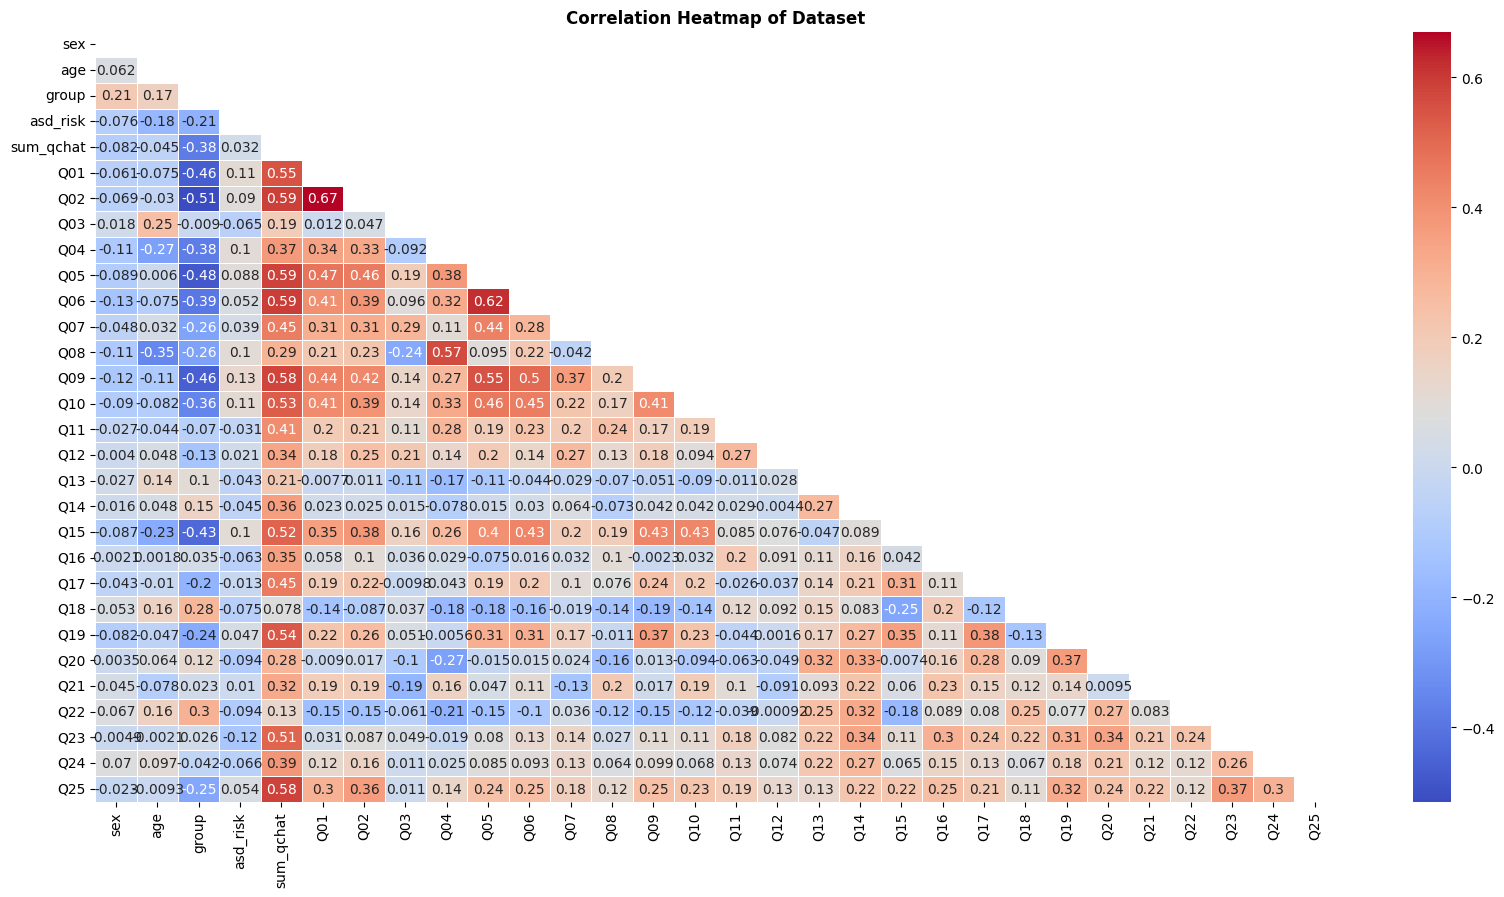

In [7]:
# Assuming 'data' is your DataFrame
corr = data.corr(numeric_only=True)

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

plt.figure(figsize=(20, 10))

# Draw the heatmap with the mask applied
sns.heatmap(corr, mask=mask, annot=True, cmap="coolwarm", linewidths=.5)

plt.title("Correlation Heatmap of Dataset", weight="bold")
plt.show()

This code generates a mask to hide the upper triangle, and then plots the lower triangle of the matrix with annotations. This approach helps in better understanding the relationships between variables without redundant information, as each correlation pair is displayed only once.











## FREQUENCY TABLE OF CORRELATION MATRIX OF ENTIRE DATASET

In [ ]:
correlation_matrix = data.corr(numeric_only=True)

In [ ]:
# 1D representation of the flattened correlation matrix
correlation_values = correlation_matrix.values.flatten()

In [ ]:
# count occurence of each value
correlation_counts = np.unique(correlation_values, return_counts=True)

In [ ]:
# create frequency table
frequency_table = pd.DataFrame({"Correlation Value" : correlation_counts[0], "Frequency" : correlation_counts[1]})

In [ ]:
frequency_table

Correlation Value  Frequency
0            -0.514284          2
1            -0.479383          2
2            -0.463414          2
3            -0.460867          2
4            -0.434519          2
..                 ...        ...
431           0.591749          2
432           0.594176          2
433           0.621735          2
434           0.670576          2
435           1.000000         30

[436 rows x 2 columns]

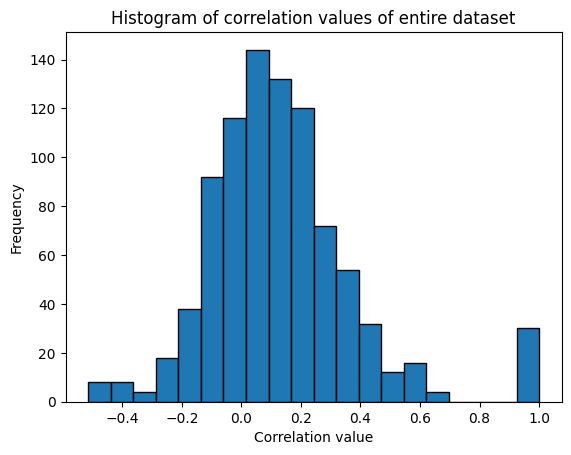

In [ ]:
# visualizing the frequency
plt.hist(correlation_values, bins=20, edgecolor="black")
plt.xlabel("Correlation value")
plt.ylabel("Frequency")
plt.title("Histogram of correlation values of entire dataset")
plt.show()

The code generates a histogram to visualize how correlation values are distributed across the entire dataset. By examining the frequency of different correlation values, one can gain insights into the overall correlation structure within the dataset, such as identifying whether most variables have weak or strong correlations.

The frequency table and graph above shows a summary of the output gotten from the correlation matrix, from the above the -0.1 to the 0.1 scores occured more on the correlation matrix of the entire dataset.

## FREQUENCY TABLE OF CORRELATION MATRIX OF Q_25 DATASET

In [ ]:
correlation_matrix = q_chat.corr(numeric_only=True)

In [ ]:
# 1D representation of the flattened correlation matrix
correlation_values = correlation_matrix.values.flatten()

In [ ]:
# count occurence of each value
correlation_counts = np.unique(correlation_values, return_counts=True)

In [ ]:
# create frequency table
frequency_table = pd.DataFrame({"Correlation Value" : correlation_counts[0], "Frequency" : correlation_counts[1]})

In [ ]:
frequency_table

Correlation Value  Frequency
0            -0.271052          2
1            -0.251931          2
2            -0.239364          2
3            -0.205276          2
4            -0.193384          2
..                 ...        ...
296           0.554093          2
297           0.567715          2
298           0.621735          2
299           0.670576          2
300           1.000000         25

[301 rows x 2 columns]

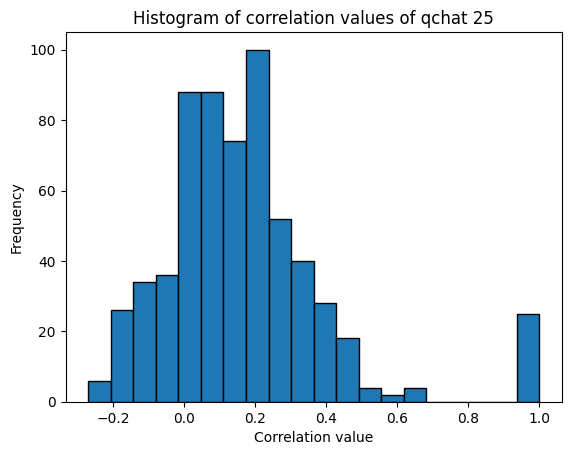

In [ ]:
# visualizing the frequency
plt.hist(correlation_values, bins=20, edgecolor="black")
plt.xlabel("Correlation value")
plt.ylabel("Frequency")
plt.title("Histogram of correlation values of qchat 25")
plt.show()

The frequency table and graph above shows a summary of the output gotten from the correlation matrix, from the above the 0.0 to the 0.3 scores occured more on the correlation matrix of the q_25 dataset.

In [ ]:
# selecting some columns of the dataset
data.iloc[:, 6:].head()

Q01  Q02  Q03  Q04  Q05  Q06  Q07  Q08  Q09  Q10  ...  Q16  Q17  Q18  Q19  \
0    2    2    1    0    1    1    4    0    4    0  ...    1    4    1    4   
1    2    1    0    4    2    4    0    4    2    3  ...    0    4    0    1   
2    2    3    4    2    2    2    2    0    4    4  ...    2    3    2    2   
3    4    2    0    4    4    4    1    1    4    4  ...    3    1    0    2   
4    1    2    1    1    2    1    3    1    3    1  ...    3    4    2    2   

   Q20  Q21  Q22  Q23  Q24  Q25  
0    4    0    0    0    0    3  
1    0    2    0    0    0    0  
2    0    0    0    0    0    0  
3    0    2    0    2    1    2  
4    1    0    1    3    0    2  

[5 rows x 25 columns]

[Text(0, 0, '782'),
 Text(0, 0, '870'),
 Text(0, 0, '945'),
 Text(0, 0, '1003'),
 Text(0, 0, '1038'),
 Text(0, 0, '1101'),
 Text(0, 0, '1123'),
 Text(0, 0, '1126'),
 Text(0, 0, '1155'),
 Text(0, 0, '1175'),
 Text(0, 0, '1184'),
 Text(0, 0, '1199'),
 Text(0, 0, '1205'),
 Text(0, 0, '1235'),
 Text(0, 0, '1313'),
 Text(0, 0, '1382'),
 Text(0, 0, '1418'),
 Text(0, 0, '1525'),
 Text(0, 0, '1540'),
 Text(0, 0, '1561'),
 Text(0, 0, '1657'),
 Text(0, 0, '1667'),
 Text(0, 0, '1689'),
 Text(0, 0, '1929'),
 Text(0, 0, '1960')]

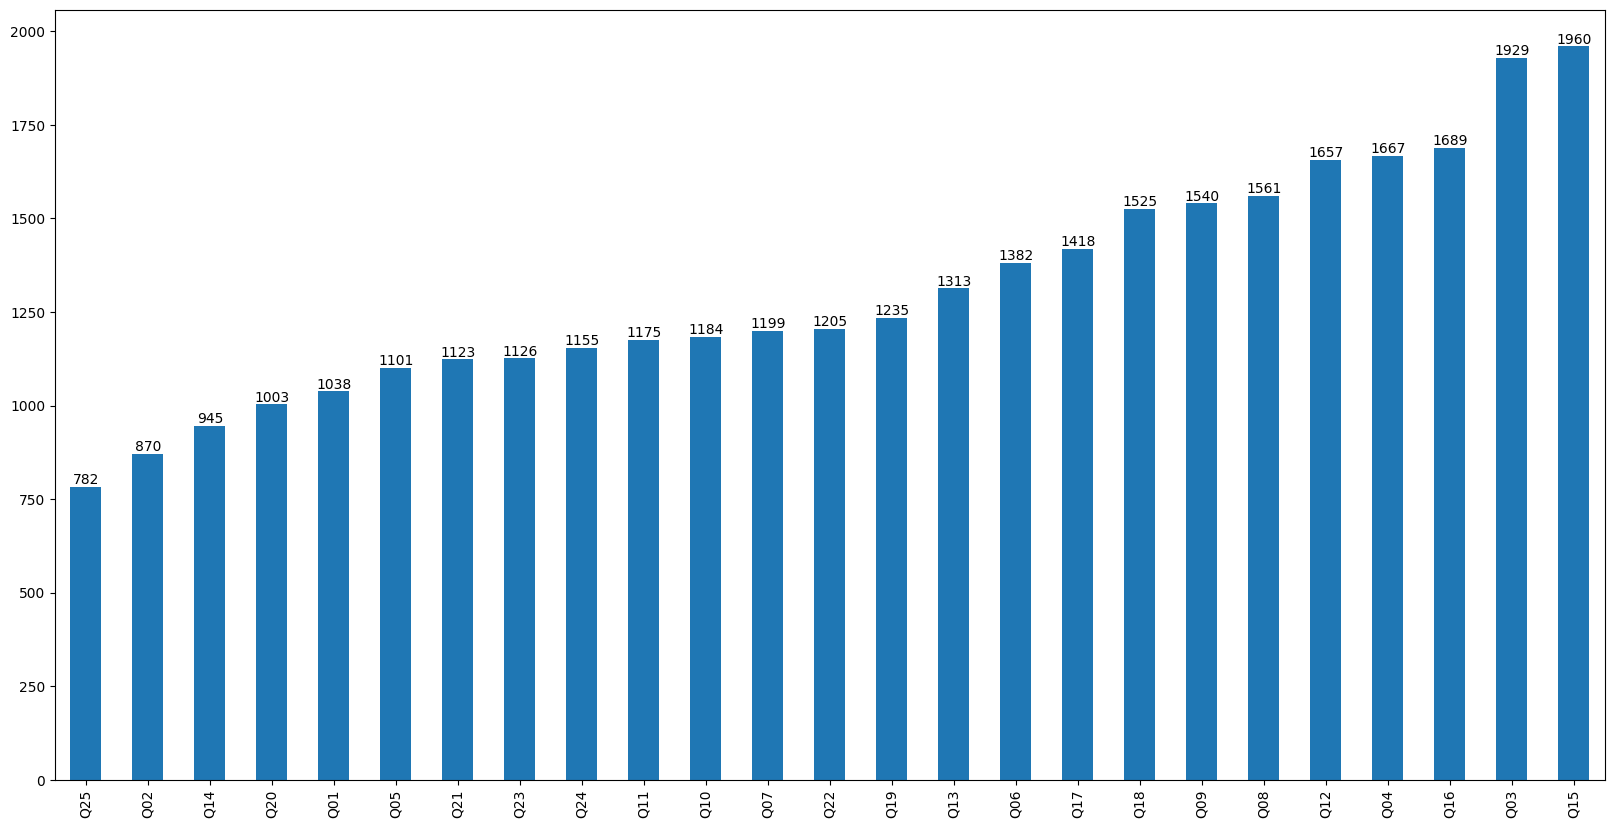

In [ ]:
# plotting the sum of value counts of the q25 columns
plt.figure(figsize=(20, 10))
ax = data.iloc[:, 6:].sum().sort_values().plot(kind = "bar")
ax.bar_label(ax.containers[0])

This plot illustrates the total count of itemized values for the Q_25 chats, representing the sum of values across each column from Q1 to Q25.

### GENERAL COUNTPLOT

The countplot shows the frequency distribution of items in each features in the dataset.

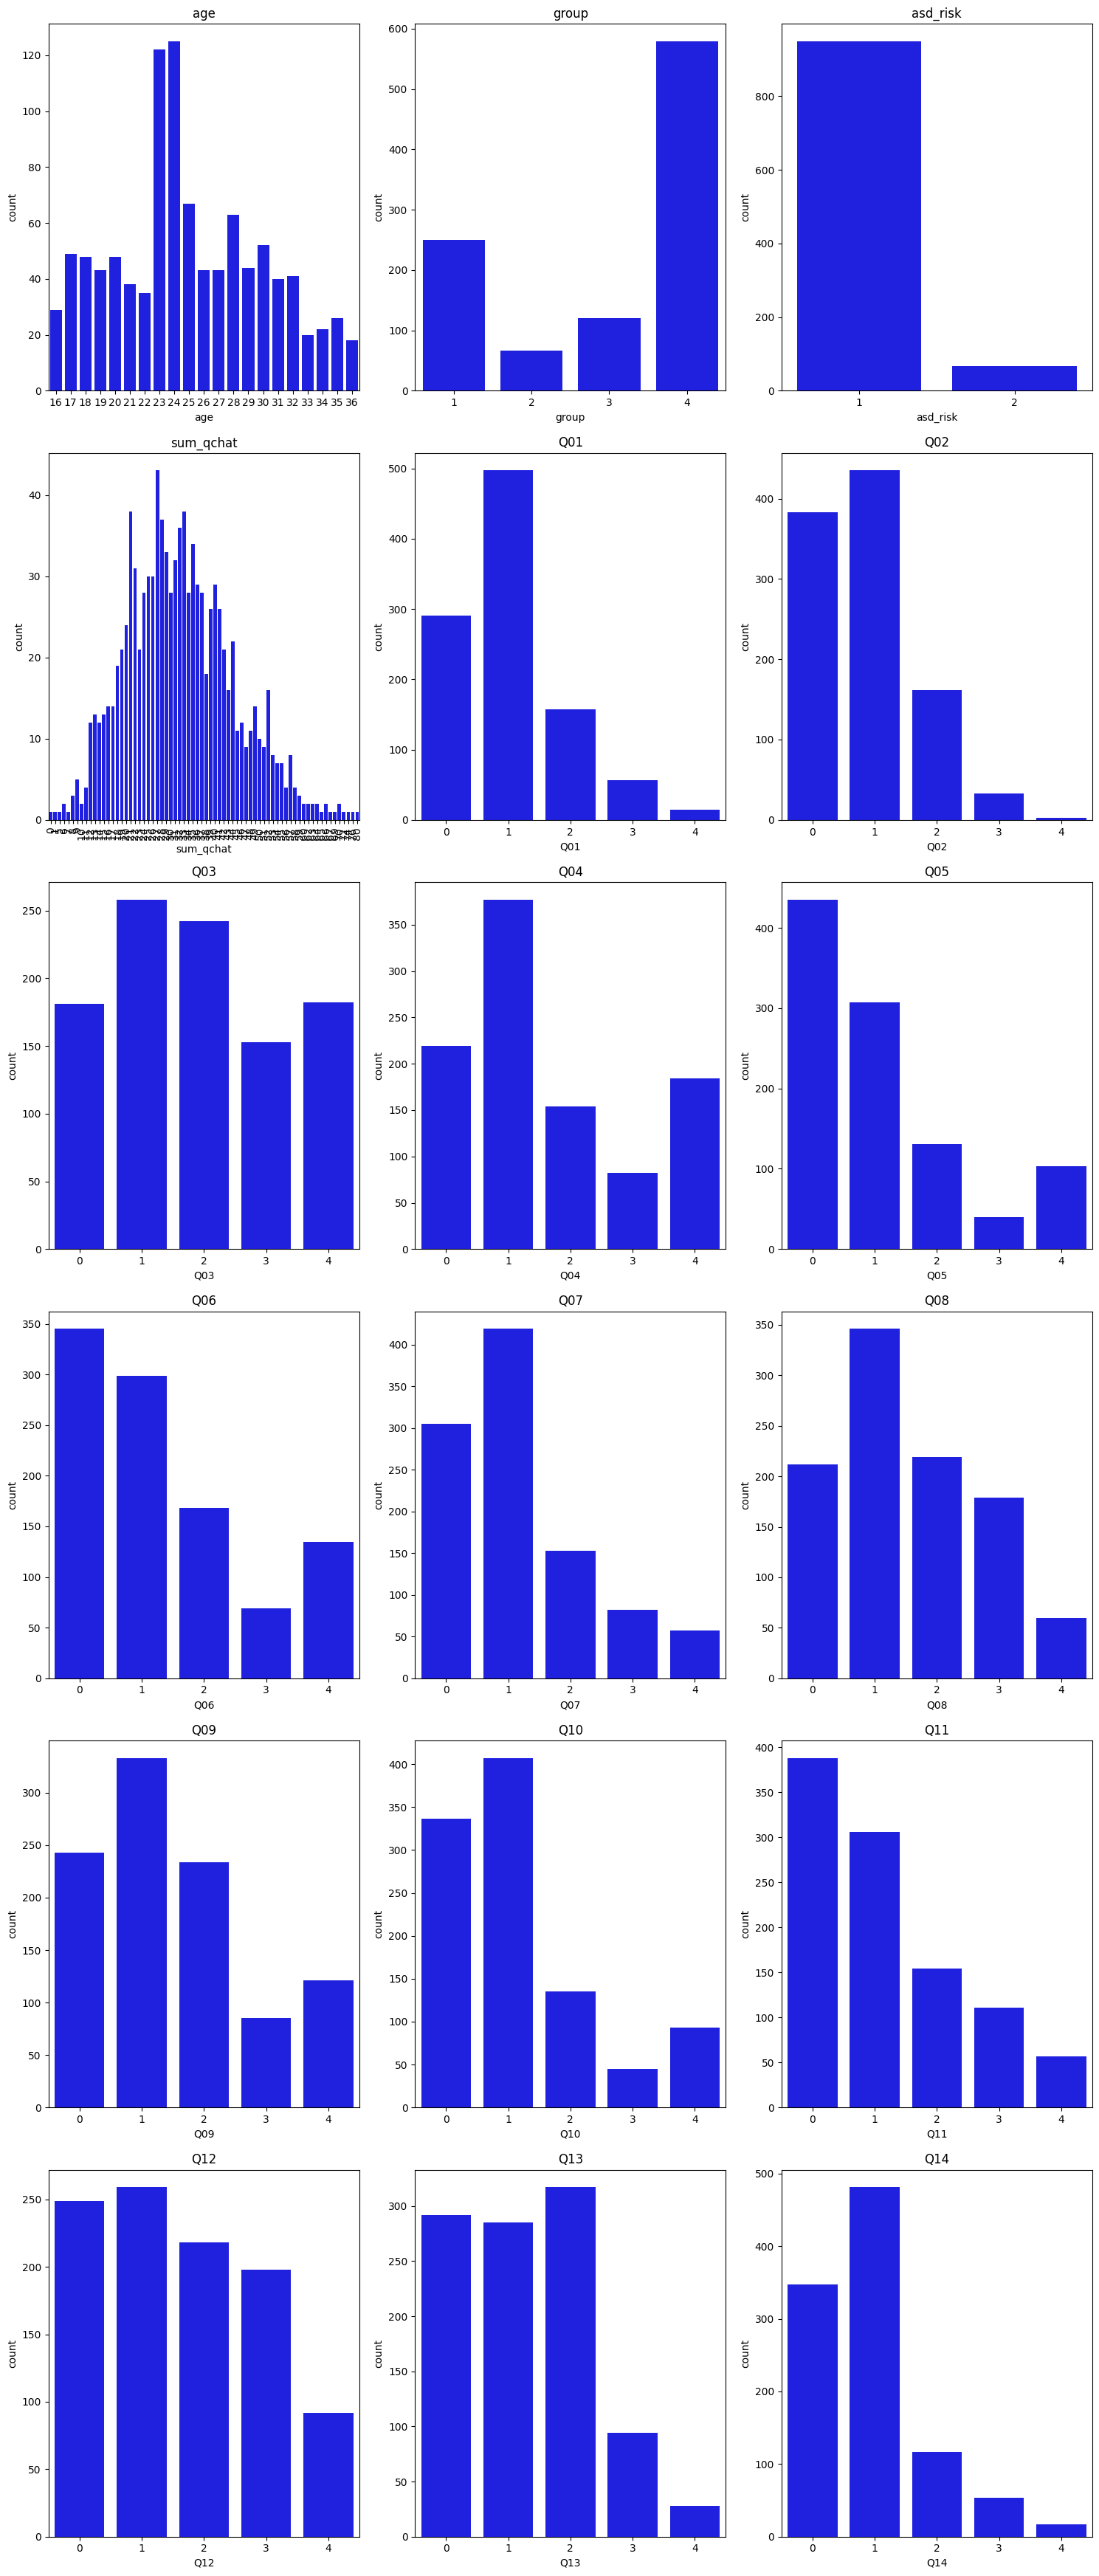

In [12]:
# Create subplots
fig, axes = plt.subplots(6, 3, figsize=(15, 35))  # Create a grid of subplots (6 rows by 3 columns) with a specified figure size
axes = axes.ravel()  # Flatten the array of axes for easy iteration

# Loop through the columns of the DataFrame starting from the third column (index 2)
for i, col in enumerate(data.iloc[:, 2:]):
    if i < len(axes):  # Ensure the current index does not exceed the available axes
        sns.countplot(x=data[col], ax=axes[i], color="blue")  # Plot the count plot for the current column
        axes[i].set_title(col)  # Set the title of the subplot to the column name
        if col == "sum_qchat":  # Check if the current column is "sum_qchat"
            axes[i].tick_params(axis="x", labelrotation=90)  # Rotate the x-axis labels by 90 degrees for better readability
    else:
        break  # Exit the loop if all axes are filled
# Adjust subplots to fit in the figure area
plt.tight_layout()

# Display the plots
plt.show()

This plot represents the general individual counts for each observation in each feature on the dataset. It is good for visualizing the distribution of the categorical data. It is also a frequency distribution plot showin the total number of items individually for each feature in the dataset.

### DATA DISTRIBUTION ON AGE AND Q_CHAT 10 SCORE

In [ ]:
data.iloc[:, [2, 5]].head(1)

age  sum_qchat
0   24         37

## DENSITY PLOT

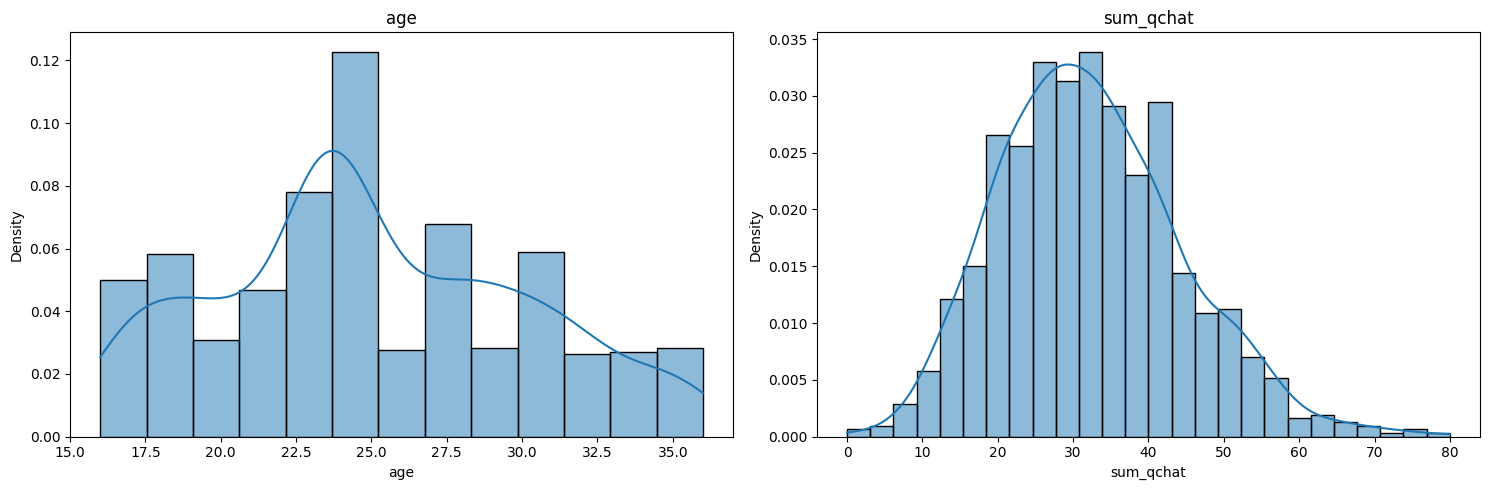

In [ ]:
# creating a density plot between the age and sum_qchat
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
axes = axes.ravel()

for i, col in enumerate(data.iloc[:, [2, 5]]):
    sns.histplot(x = data[col], ax = axes[i], stat="density", kde=True)
    axes[i].set_title(col)
plt.tight_layout()
plt.show()

- Density refers to the measure of how much mass or probability is concentrated around a particular value within a distribution.
- The graph below illustrates the distribution of children's ages, showing the density of the number of children within each age group. Additionally, the sum_qchat metric represents the density of the total sums within those age groups.


Additionally, the children's plot indicates that the ages are most densely concentrated between 22.5 and 25.0 years. Over time, the distribution is expected to evolve as the age structure changes.

The sum_qchat metric shows higher density within the range of 25 to 30, highlighting the concentration of total sums within this interval.

### HISTOGRAM WITH GAUSSIAN DISTRIBUTION PLOT

A gaussian curve is a normal distribution or a bell curve distribution. The shape of the curve is symmetrical with most of the important observations clustering around the average or mean value.

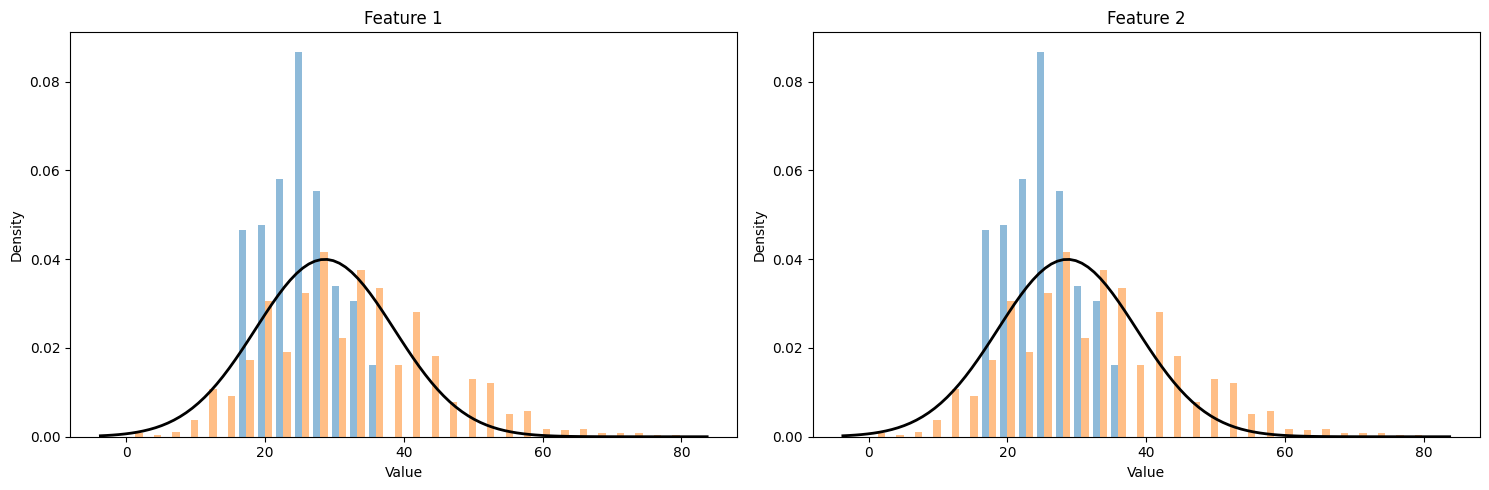

In [4]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

for i in range(2):
    # Create histograms for the features in the specified columns
    axs[i].hist(data.iloc[:, [2, 5]], bins=30, density=True, alpha=0.5)

    # Fit a normal distribution to the data of the specified columns
    mu, std = norm.fit(data.iloc[:, [2, 5]])

    # Generate values for the x-axis based on the current axis limits
    xmin, xmax = axs[i].get_xlim()
    x = np.linspace(xmin, xmax, 100)

    # Compute the probability density function (PDF) of the normal distribution
    p = norm.pdf(x, mu, std)

    # Plot the Gaussian distribution on top of the histogram
    axs[i].plot(x, p, "k", linewidth=2)

    # Set labels and title for each subplot
    axs[i].set_xlabel("Value")
    axs[i].set_ylabel("Density")
    axs[i].set_title("Feature {}".format(i+1))

plt.tight_layout()
plt.show()

The age column in the dataset comprises 1016 entries, each representing an individual. The mean age across all participants is approximately 25 month(24.9), with a standard deviation of around 5 months, indicating a moderate level of variability in age distribution.

The minimum age recorded in the dataset is 16 months, while the maximum age is 36 months. The majority of participants fall within the age range of 21 to 29 months, with 25% of individuals aged below 21 years and 75% below 29 months.

It's noteworthy that the dataset predominantly includes individuals within a relatively narrow age range, with the median age being 24 months. This suggests a somewhat homogeneous age distribution among the participants, albeit with a few outliers towards both the younger and older ends of the spectrum.

The line on the chart shows a normal distribution on the dataset.

## MULTIVARIATE ANALYSIS

### Q-CHAT SUM AND AGE WITH ASD RISK

The plots provide a visual comparison of the distribution of 'sum_qchat' and 'age' between two groups (with ASD risk = 1 and ASD risk = 2), showing how these variables differ between the groups.

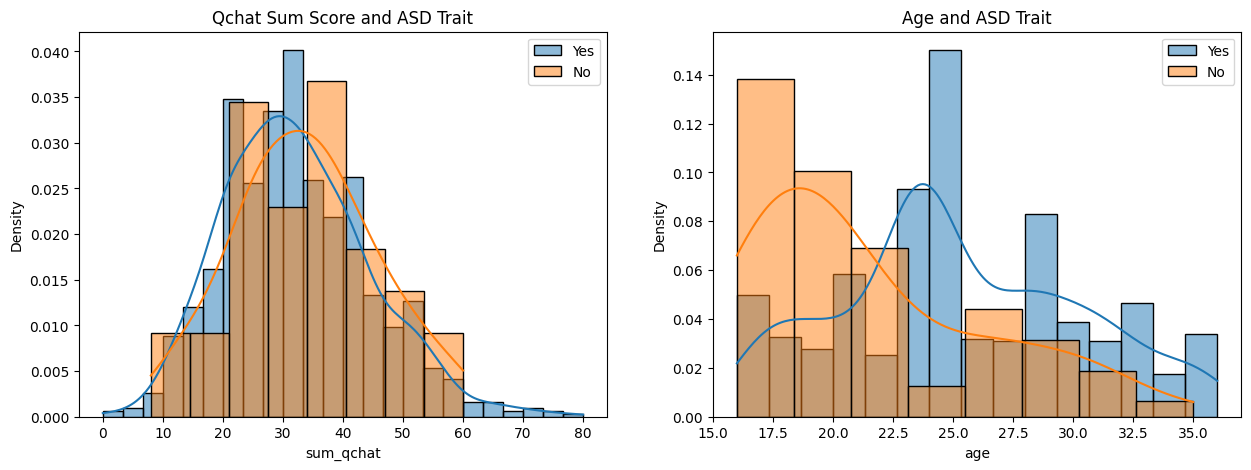

In [13]:
# Create a figure with two subplots arranged in one row and two columns
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Plot a histogram for 'sum_qchat' with density and KDE (Kernel Density Estimate) for ASD risk = 1
sns.histplot(x=data[data["asd_risk"] == 1]["sum_qchat"], label="Yes", ax=axes[0], stat="density", kde=True)

# Plot a histogram for 'sum_qchat' with density and KDE for ASD risk = 2
sns.histplot(x=data[data["asd_risk"] == 2]["sum_qchat"], label="No", ax=axes[0], stat="density", kde=True)

# Set the title for the first subplot
axes[0].set_title("Qchat Sum Score and ASD Trait")

# Add a legend to the first subplot
axes[0].legend(loc="upper right")

# Plot a histogram for 'age' (converted to integer) with density and KDE for ASD risk = 1
sns.histplot(x=(data[data["asd_risk"] == 1]["age"]).astype(int), label="Yes", ax=axes[1], stat="density", kde=True)

# Plot a histogram for 'age' (converted to integer) with density and KDE for ASD risk = 2
sns.histplot(x=(data[data["asd_risk"] == 2]["age"]).astype(int), label="No", ax=axes[1], stat="density", kde=True)

# Set the title for the second subplot
axes[1].set_title("Age and ASD Trait")

# Add a legend to the second subplot
axes[1].legend(loc="upper right")

# Display the plots
plt.show()


The analysis of ASD risk levels reveals notable variations in Q-CHAT scores, providing valuable insights into the potential correlation between ASD risk and questionnaire responses. Here is a comprehensive overview:

- ASD Risk Level 1: Scores within this category range from 0 to approximately 65, exhibiting variability and the presence of outliers. The median Q-CHAT score stands at 31, with the 25th and 75th percentiles recorded at 23 and 40, respectively. These statistics suggest a diverse distribution of scores, indicating varying levels of social communication behaviors among participants categorized under ASD Risk Level 1.

- ASD Risk Level 2: Scores for participants in this group range from approximately 8 to 60, with a median score of 35. The 25th and 75th percentiles are observed at scores 27 and 41, respectively. Notably, individuals classified with higher ASD risk levels tend to exhibit higher Q-CHAT scores, suggesting a potential association between elevated ASD risk and increased social communication challenges as reflected in questionnaire responses.

The observed trends underscore the importance of considering ASD risk levels in understanding the nuances of social communication behaviors and potential indicators of autism spectrum disorders. Although there seems to be a relationship between ASD RISK 1 and high Total QCHAT Score further exploration into the relationship between ASD risk levels and Q-CHAT scores may provide valuable insights into early detection and intervention strategies for individuals at risk of ASD.

#### REPLACING THE COLUMN FEATURES  TO THE STRING COMPONENTS IN THE DATAFRAME

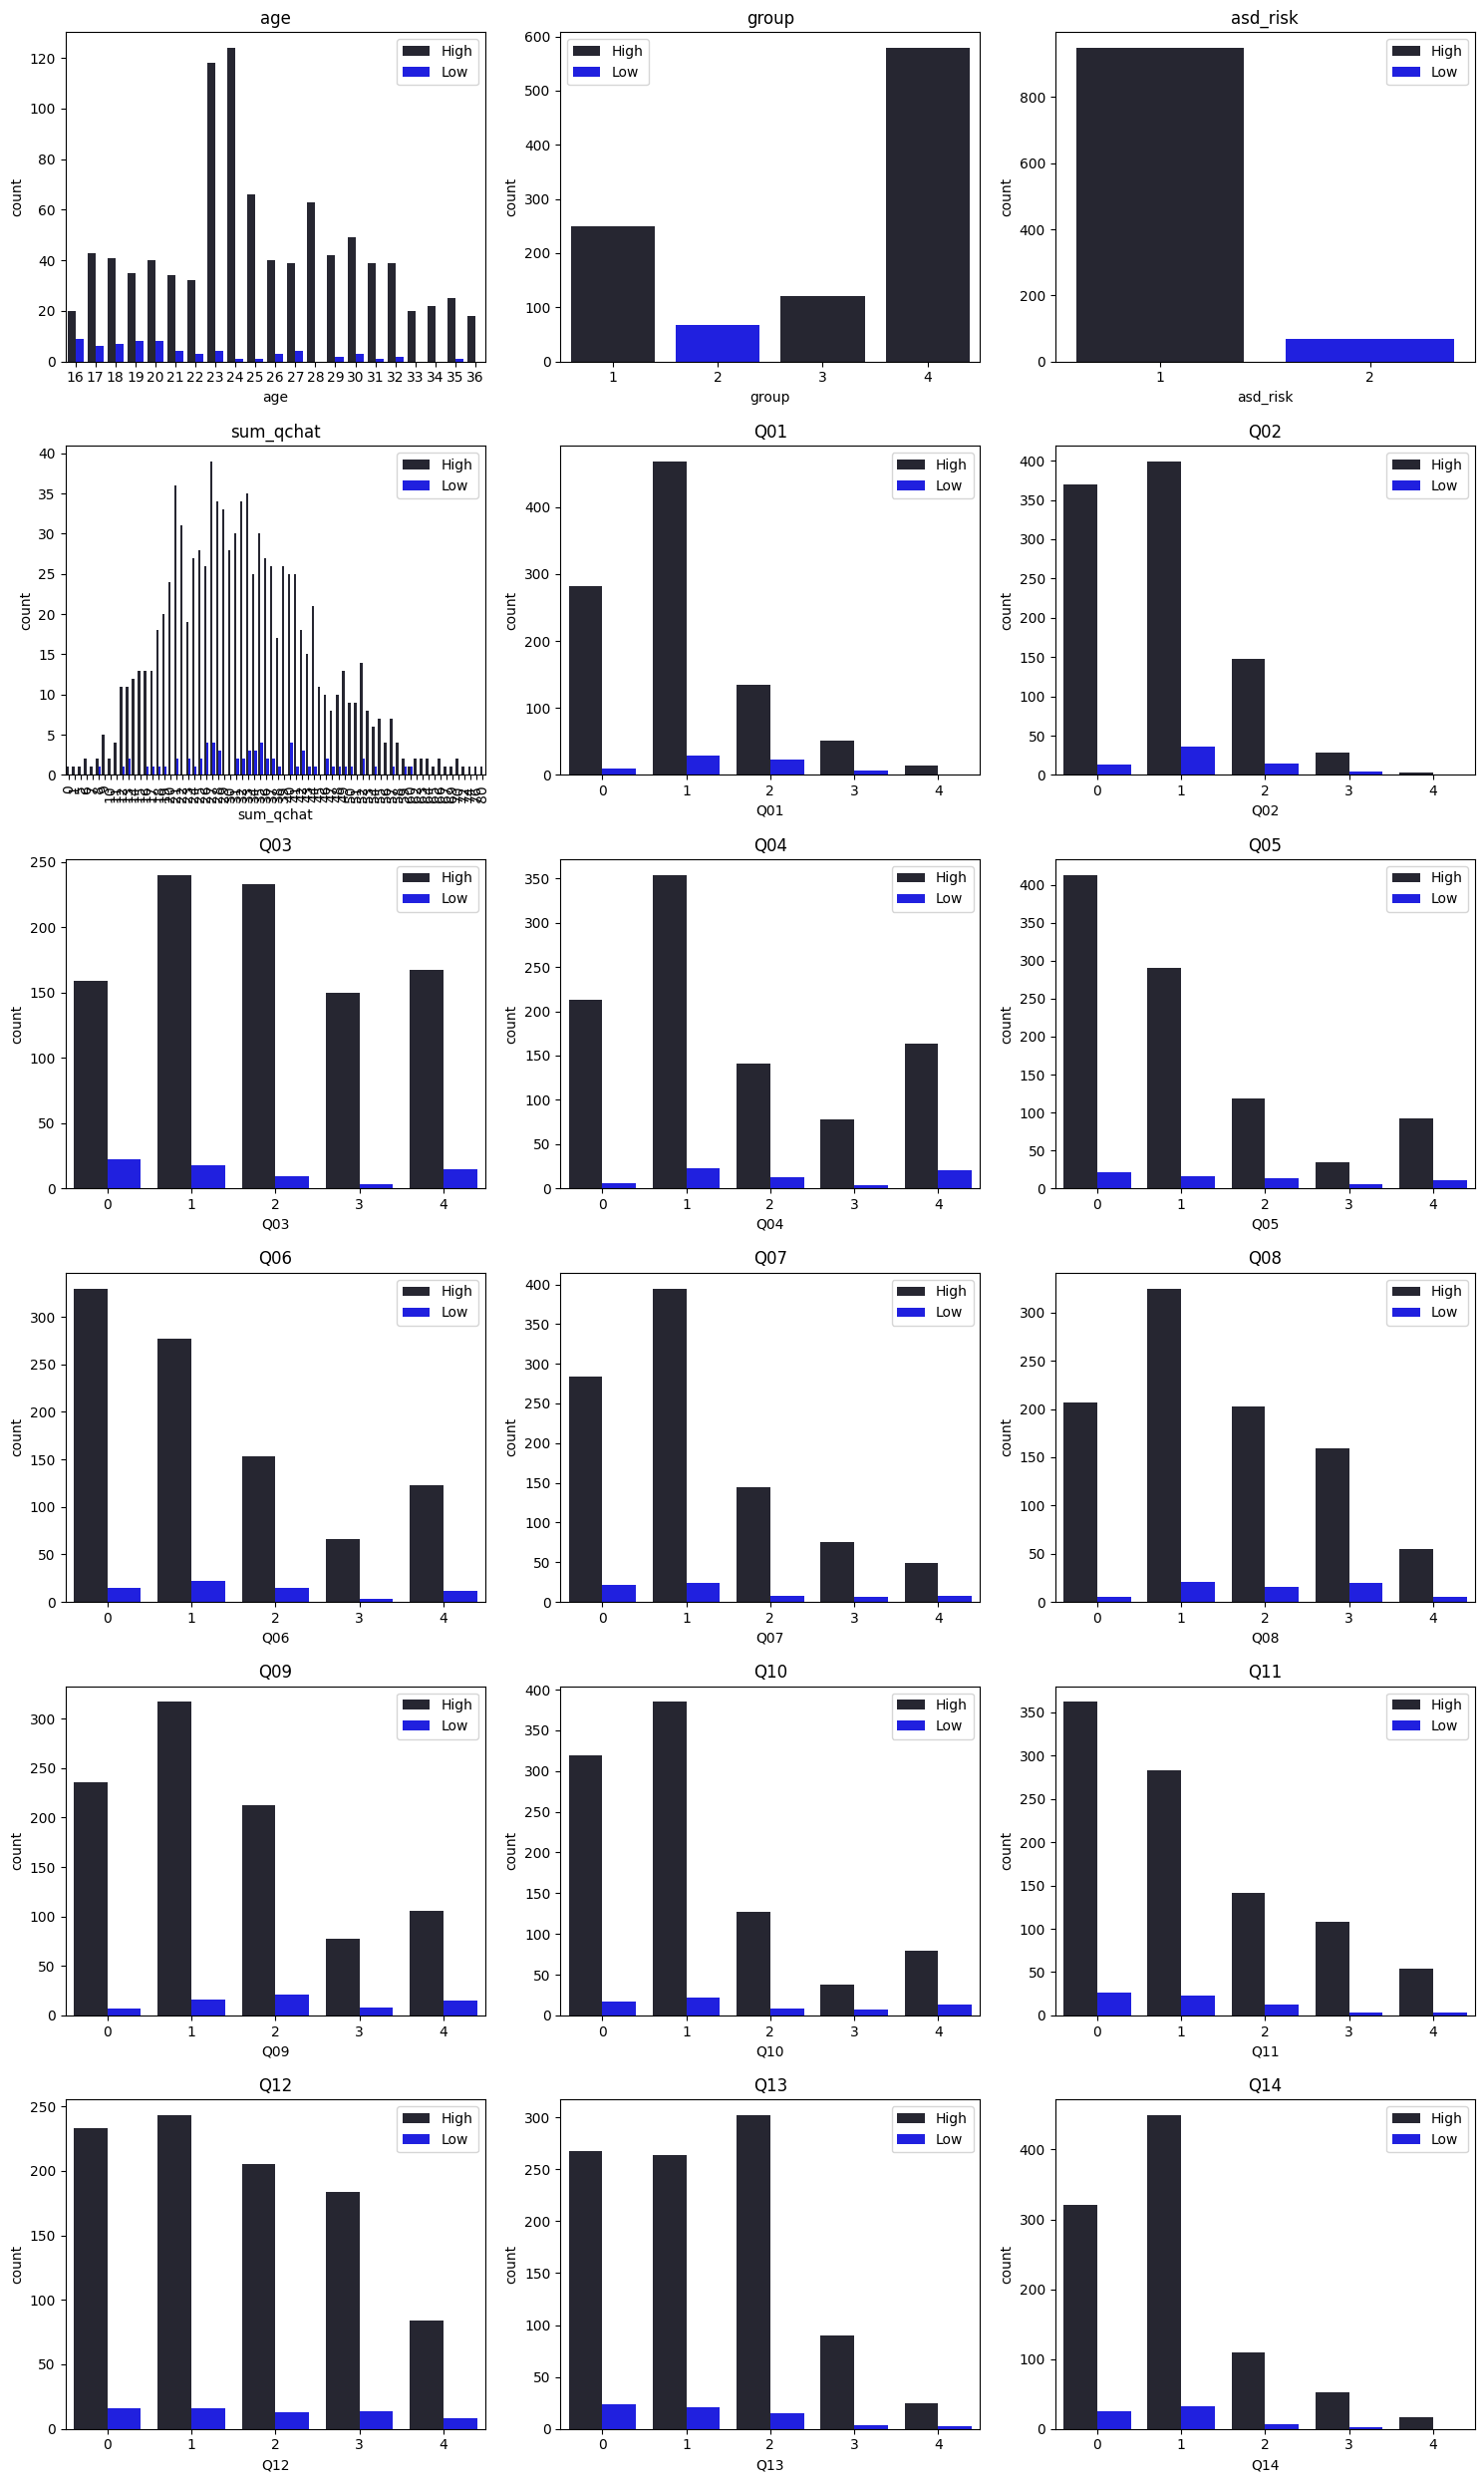

In [17]:
# Define legend labels mapping
legend_labels = {1: "High", 2: "Low"}

# Create subplots and iterate over columns
fig, axes = plt.subplots(6, 3, figsize=(15, 25))
axes = axes.ravel()

for i, col in enumerate(data.iloc[:, 2:]):
    if i < len(axes):  # Ensure the current index does not exceed the axes available
        # Create countplot with specified hue and color
        sns.countplot(x=data[col], hue=data["asd_risk"], ax=axes[i], color="blue")

        # Set title for the subplot
        axes[i].set_title(col)

        # Modify legend labels
        handles, labels = axes[i].get_legend_handles_labels()
        new_labels = [legend_labels[int(label)] if label.isdigit() else label for label in labels]
        axes[i].legend(handles=handles, labels=new_labels)

        # Rotate x-axis labels if column is "sum_qchat"
        if col == "sum_qchat":
            axes[i].tick_params(axis="x", labelrotation=90)

    else:
        break

plt.tight_layout()
plt.show();


This plot shows the visualization of the countplot between the features of the dataset while further using asd risk as hue. Hence we are seeing the representation of occurences for each feature using different colours to indicate the different levels of the asd risk. This helps to show how the distribution varies across different features in the dataset.

In [7]:
# replace the column with african
group_replacement = {1 : " Developing Toddlers", 2 : "Parent Concerns", 3 : "Older Siblings with ASD", 4 : "Developmental Delay"}
data["group"] = data["group"].replace(group_replacement)

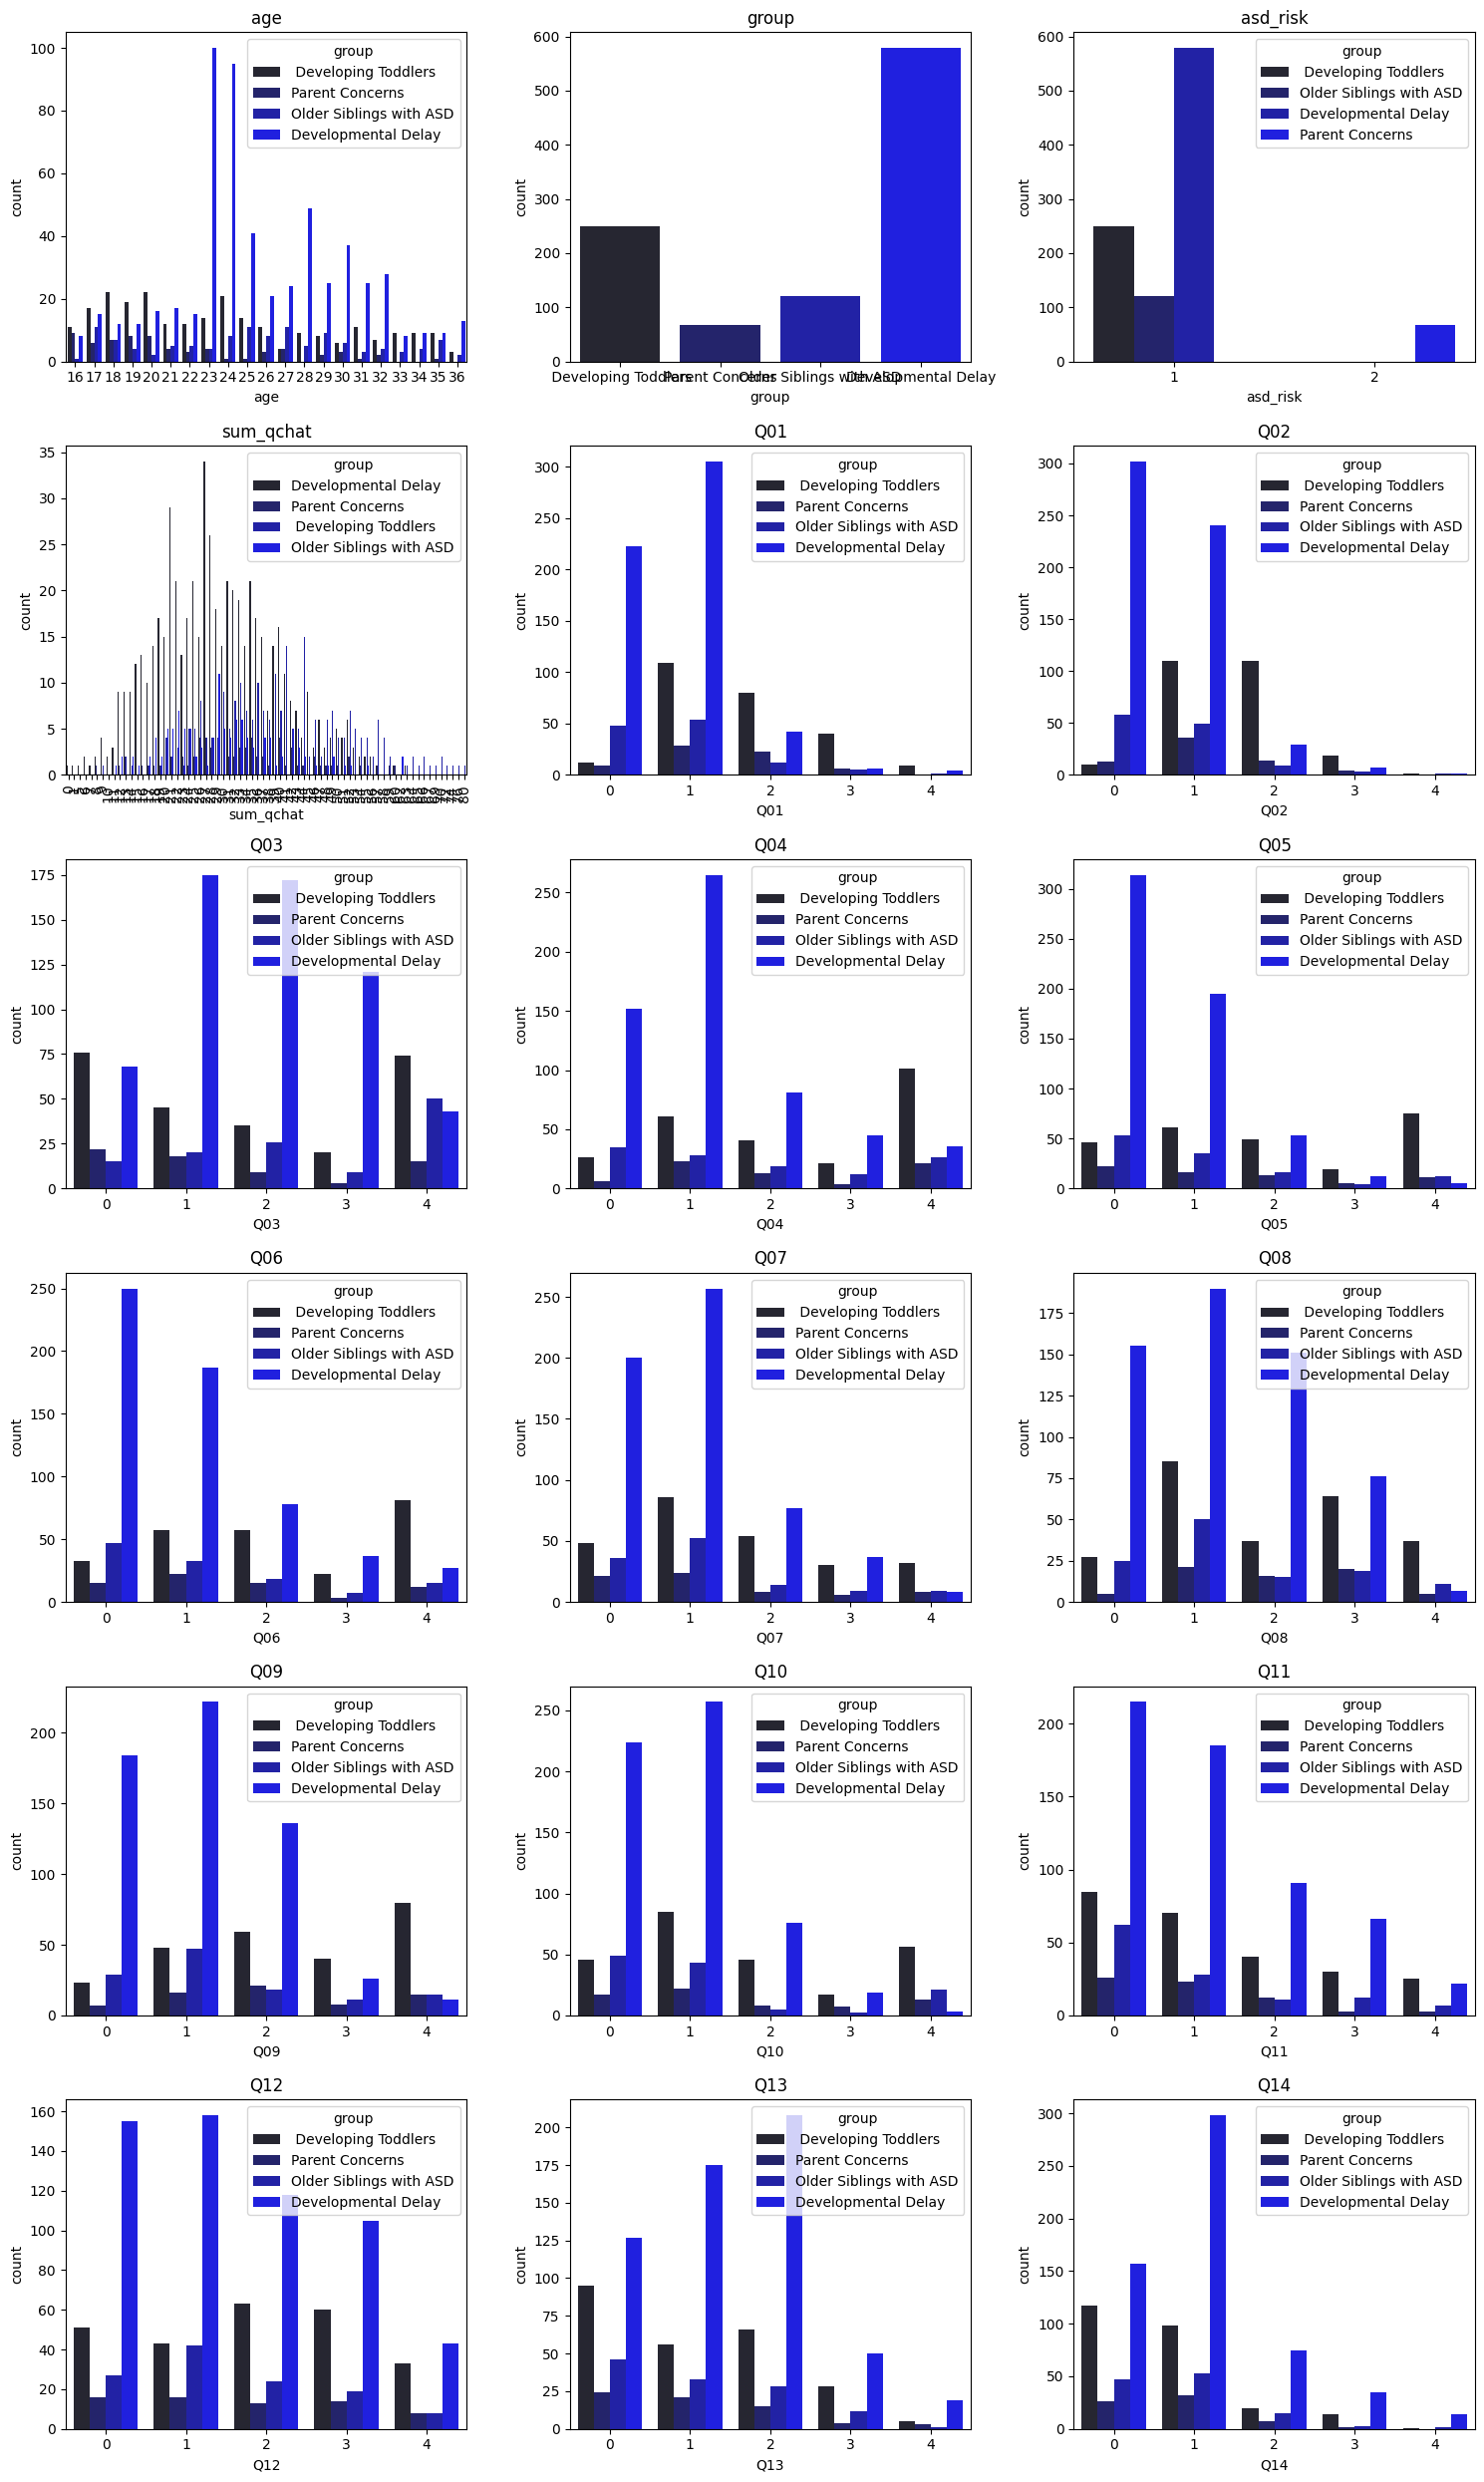

In [8]:
# Create a figure with a grid of subplots (6 rows and 3 columns) with a specified figure size
fig, axes = plt.subplots(6, 3, figsize=(15, 25))
axes = axes.ravel()  # Flatten the array of axes for easier iteration

# Iterate over the columns of the DataFrame starting from the third column
for i, col in enumerate(data.iloc[:, 2:]):  # Adjust indexing if necessary
    if i < len(axes):  # Ensure the current index does not exceed the axes available
        # Create a count plot for each column, grouped by the 'group' column
        sns.countplot(x=data[col], hue=data["group"], ax=axes[i], color="blue")
        axes[i].set_title(col)  # Set the title of each subplot to the column name

        # Rotate x-axis labels for 'sum_qchat' column to avoid overlap
        if col == "sum_qchat":
            axes[i].tick_params(axis="x", labelrotation=90)
    else:
        break  # Exit the loop if we have more columns than subplots

# Adjust layout to prevent overlap
plt.tight_layout()

# Display the plots
plt.show()

The age distribution across the various groups exhibits distinct patterns and central tendencies, providing valuable insights into the developmental stages represented within each group. Here is a detailed summary:

- Group 1: The median age for participants in this group is approximately 23.0 months, with the age range spanning from 16 to 36 months. The 25th percentile falls between 18.5 and 19 months, while the 75th percentile is around the 28.0-month mark.

- Group 2: Within this group, the median age is observed to be around the 20th month, with the 25th percentile occurring at approximately the 18th month and the 75th percentile at approximately 24.5 months. The maximum age recorded is 36 months.

- Group 3: Participants in this group exhibit a median age of approximately 26 months, with the 25th percentile occurring around the 22nd month and the 75th percentile around the 29th month. Similar to the other groups, the maximum age observed is 36 months.

- Group 4: The median age for participants in this group is approximately 24 months, with the 25th percentile occurring around the 23.5-month mark and the 75th percentile around the 29th month. As with the other groups, the maximum age recorded is 36 months.

Overall, the age distribution within each group suggests a relatively even spread, indicating a diverse representation of developmental stages. However, it is worth noting that Group 2 exhibits a slightly narrower age range compared to the other groups with presence of an outlier, which may warrant further investigation into potential underlying factors influencing participant demographics.

This plot shows the visualization of the countplot between the features of the dataset while further dividing the data by the groups. Hence we are seeing the representation of occurences for each feature using different colours to indicate the different levels of the group. This helps to show how the distribution varies across different features in the dataset.

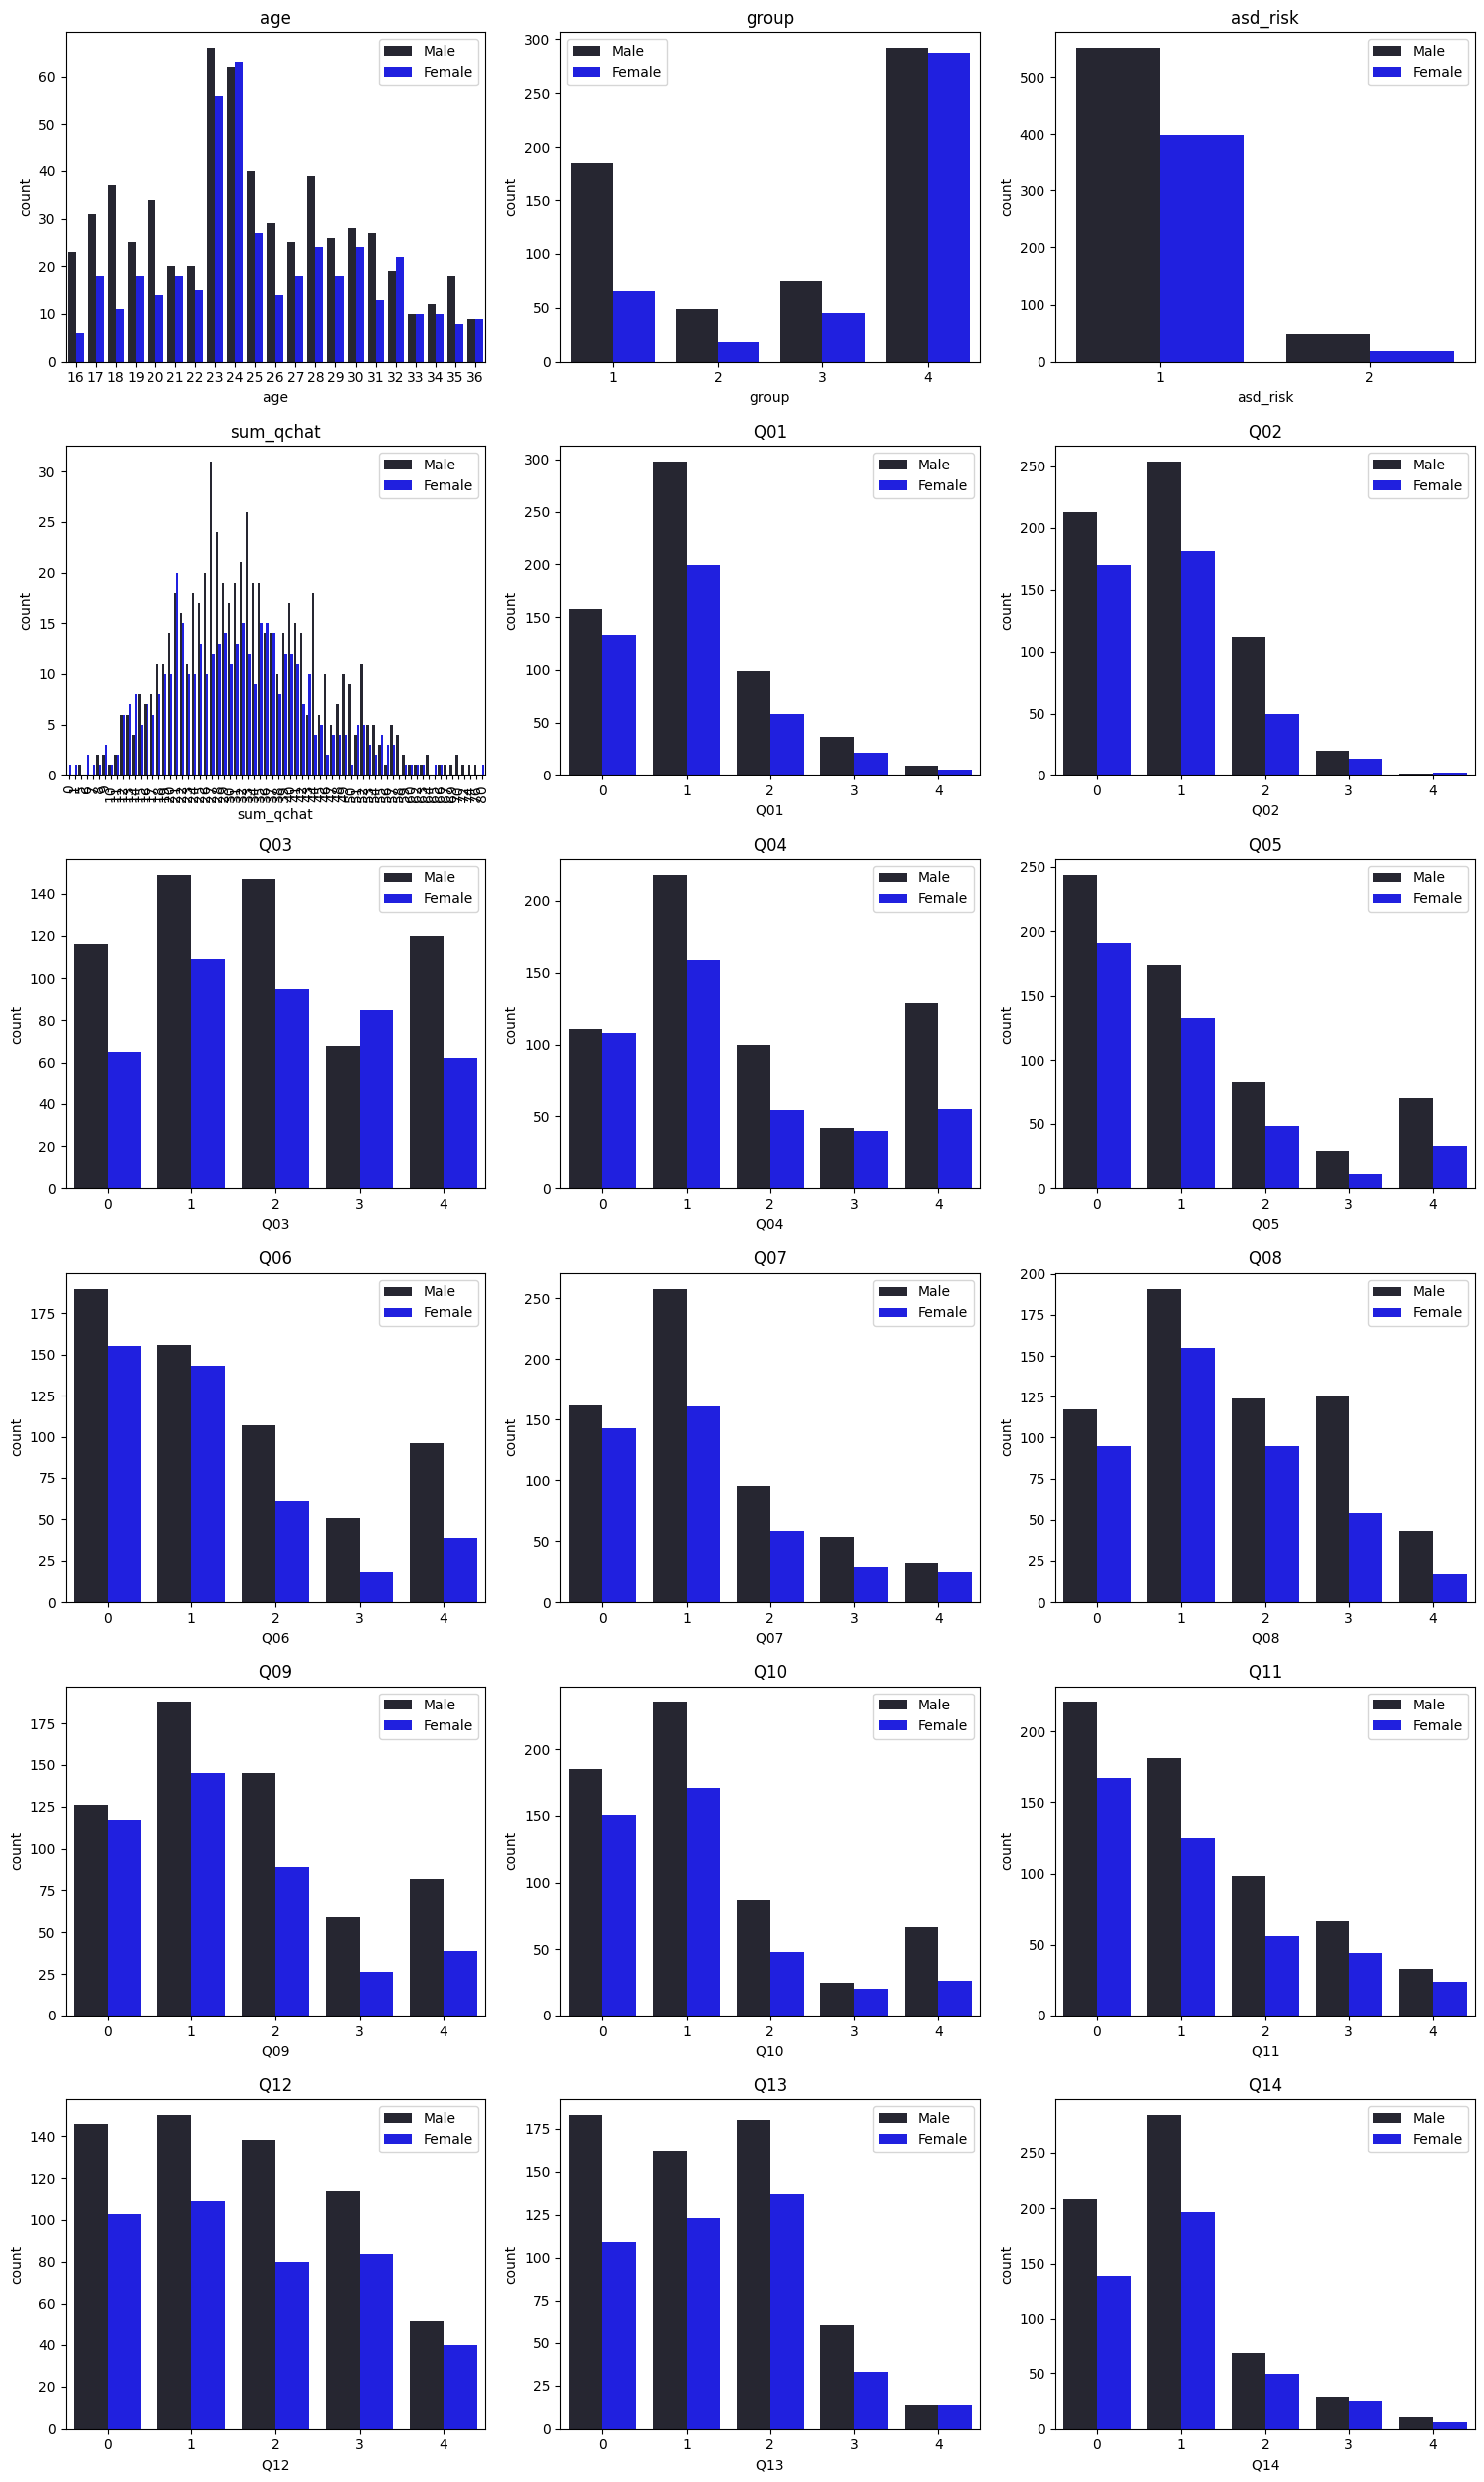

In [18]:
# Define male and female labels for legend
legend_labels = {1: "Male", 2: "Female"}

# Create subplots and iterate over columns
fig, axes = plt.subplots(6, 3, figsize=(15, 25))
axes = axes.ravel()

for i, col in enumerate(data.iloc[:, 2:]):
    if i < len(axes):  # Ensure the current index does not exceed the axes available
        # Create countplot with specified hue and color
        sns.countplot(x=data[col], hue=data["sex"], ax=axes[i], color="blue")

        # Set title for the subplot
        axes[i].set_title(col)

        # Check if the current column is "sum_qchat" to rotate x-axis labels
        if col == "sum_qchat":
            axes[i].tick_params(axis="x", labelrotation=90)

        # Modify legend labels
        handles, labels = axes[i].get_legend_handles_labels()
        new_labels = [legend_labels[int(label)] if label.isdigit() else label for label in labels]
        axes[i].legend(handles, new_labels)

    else:
        break

plt.tight_layout()
plt.show()

This plot shows the visualization of the countplot between the features of the dataset while further dividing the data by the sex of each patient. Hence we are seeing the representation of occurences for each feature using different colours to indicate the different levels of the sex. This helps to show how the distribution varies across different features in the dataset, segmenting the data based on the sex.

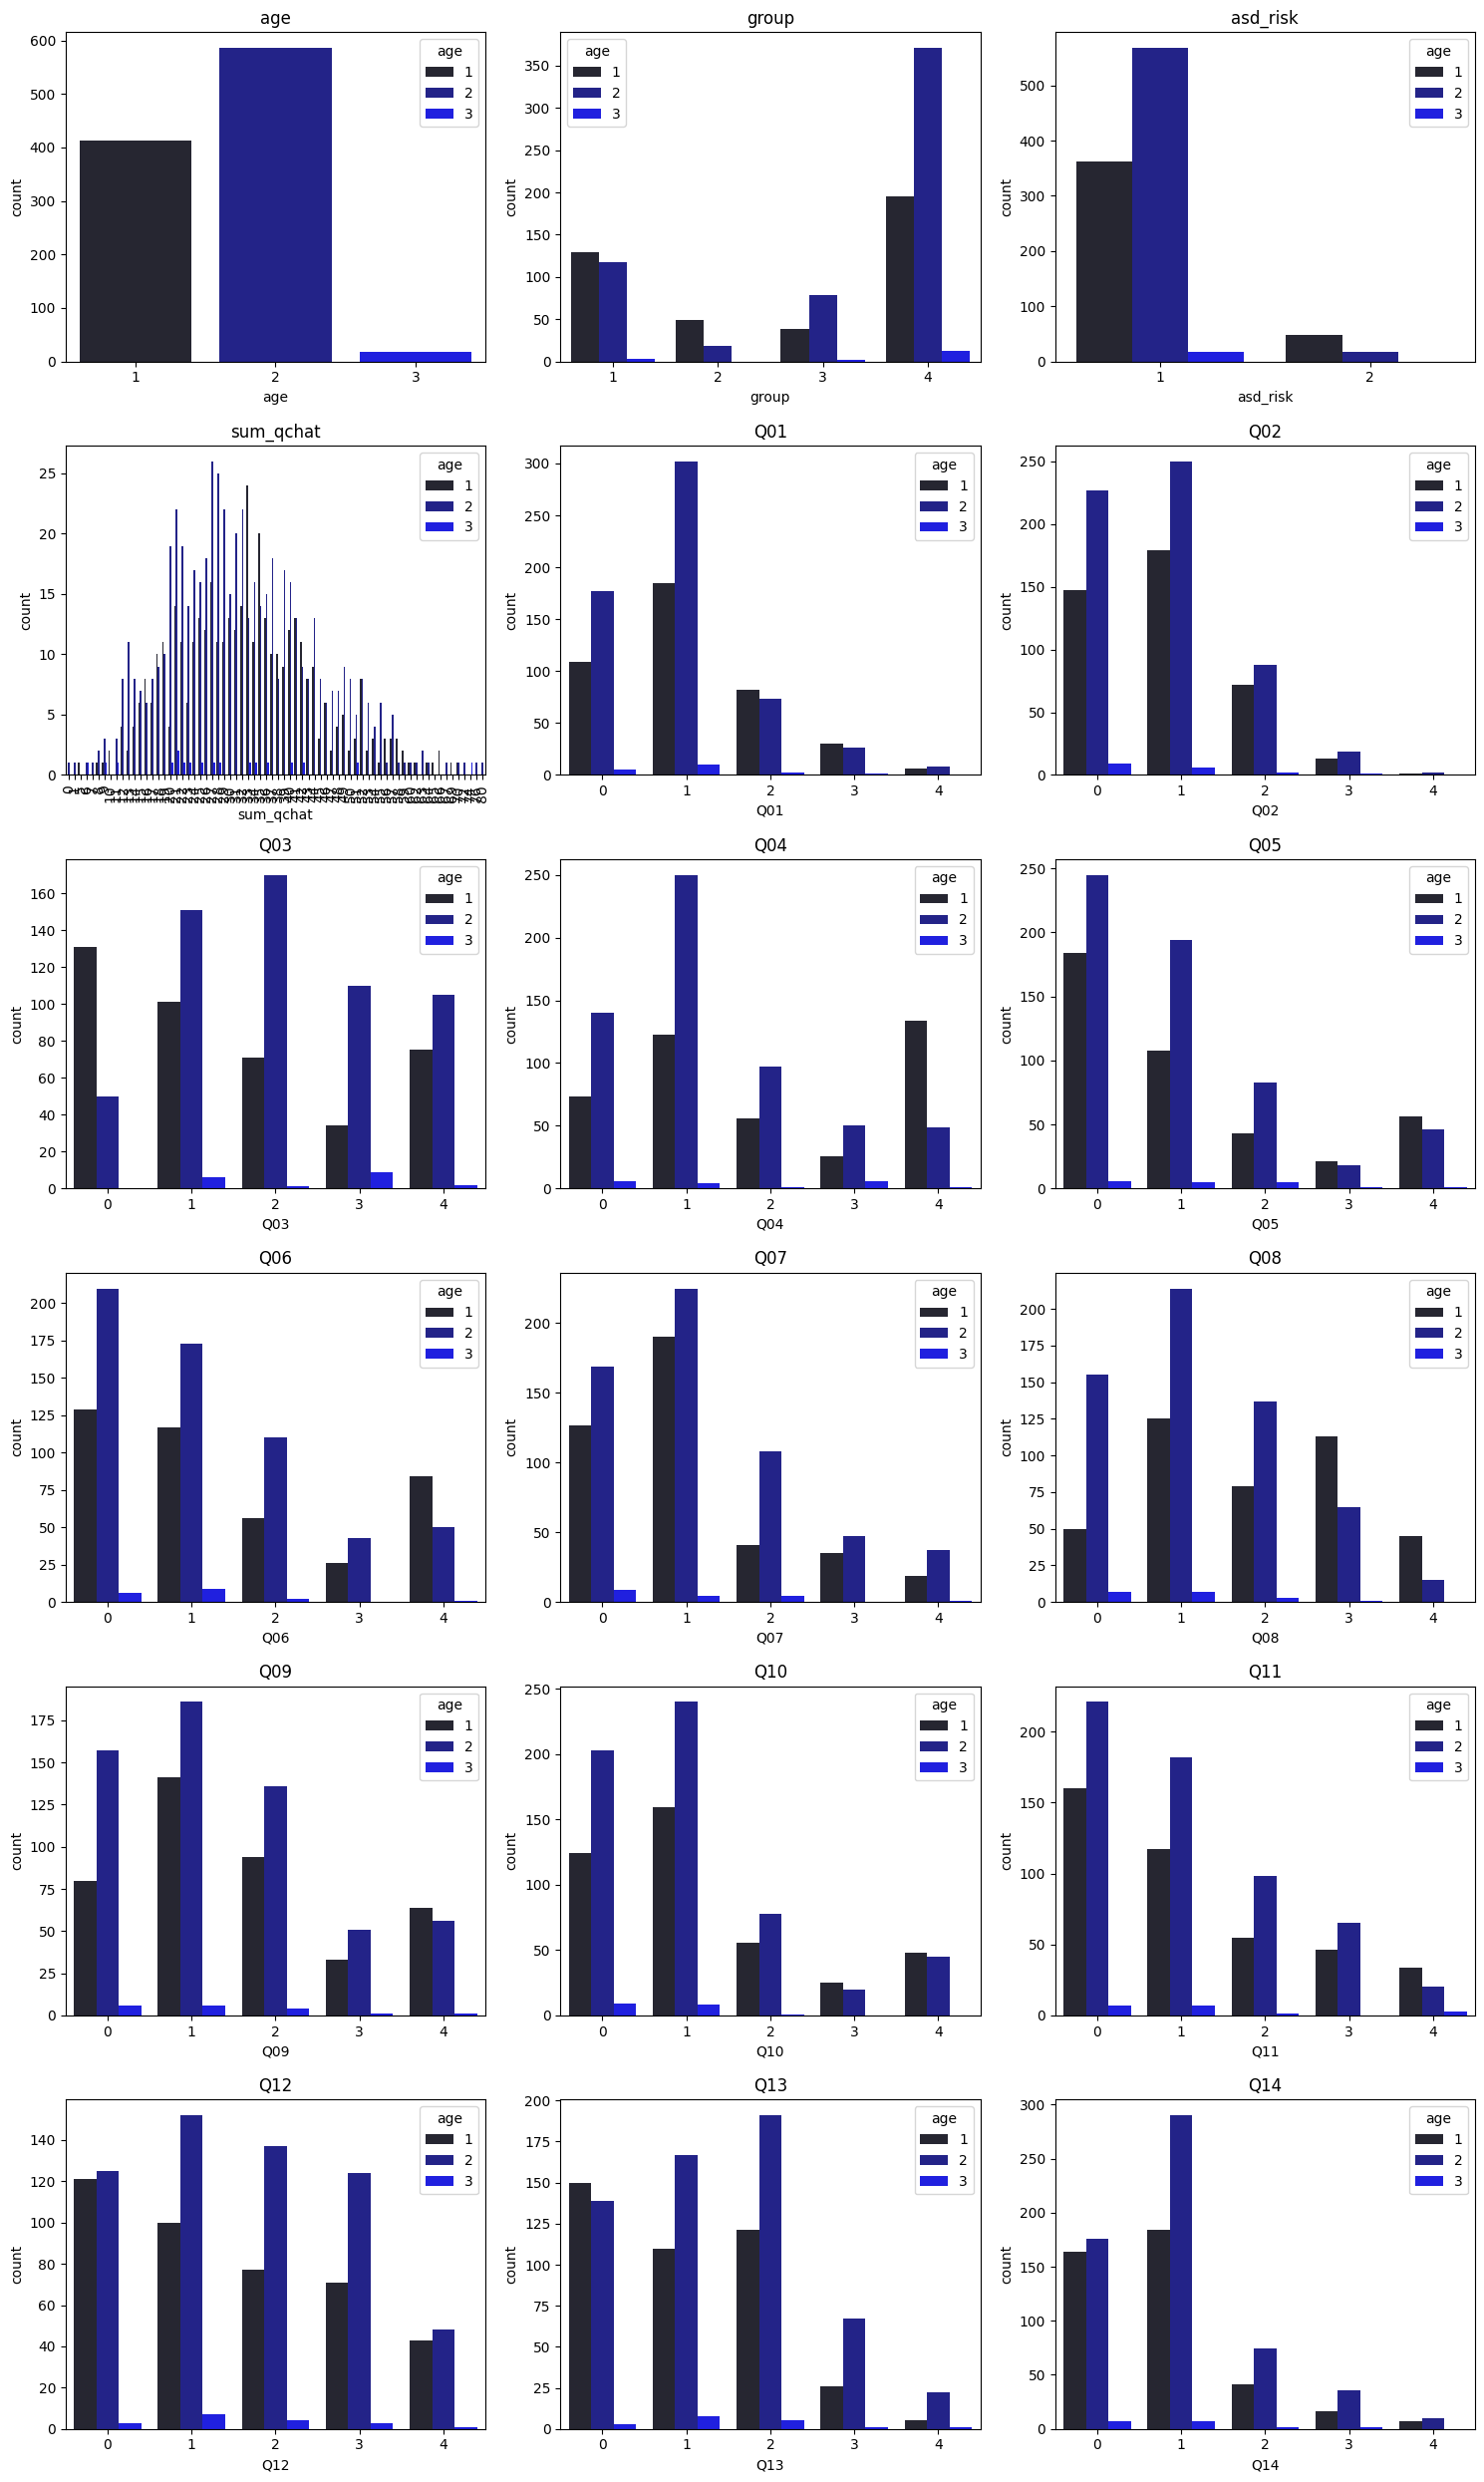

In [19]:
# Convert the 'age' column from months to years and cast it to an integer type
data["age"] = (data["age"] / 12).astype(int)

# Create a figure with a grid of subplots (6 rows and 3 columns) with a specified figure size
fig, axes = plt.subplots(6, 3, figsize=(15, 25))
axes = axes.ravel()  # Flatten the array of axes for easier iteration

# Iterate over the columns of the DataFrame starting from the third column
for i, col in enumerate(data.iloc[:, 2:]):  # Adjust indexing if necessary
    if i < len(axes):  # Ensure we do not exceed the number of subplots
        # Create a count plot for each column, grouped by age
        sns.countplot(x=data[col], ax=axes[i], hue=data["age"], color="blue")
        axes[i].set_title(col)  # Set the title of each subplot to the column name

        # Rotate x-axis labels for 'sum_qchat' column to avoid overlap
        if col == "sum_qchat":
            axes[i].tick_params(axis='x', labelrotation=90)
    else:
        break  # Exit the loop if we have more columns than subplots

# Adjust layout to prevent overlap
plt.tight_layout()

# Display the plots
plt.show()

This plot shows the visualization of the countplot between the features of the dataset while further dividing the data by the age of each patient which was further divided by 12 to give a monthly interval/segment scale. Hence we are seeing the representation of occurences for each feature using different colours to indicate the different levels of the age. This helps to show how the distribution varies across different features in the dataset, segmenting the data based on the age.

In [5]:
color = sns.color_palette("tab10")[0]

# This function displays the values in the diagram
# Reference link for the code below
# https://www.statology.org/seaborn-barplot-show-values/
def show_values(axs, orient="v", space=.01):
    def _single(ax):
        if orient == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height() + (p.get_height()*0.01)
                value = '{:.1f}'.format(p.get_height())
                ax.text(_x, _y, value, ha="center")
        elif orient == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height() - (p.get_height()*0.5)
                value = '{:.1f}'.format(p.get_width())
                ax.text(_x, _y, value, ha="left")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _single(ax)
    else:
        _single(axs)


# A function to help visualize the number of occurrences of a category
def count_plot(df,xvar):
    sns.countplot(data=df,x=xvar, color = color)
    plt.title(f"Distribution of {xvar}".title(), weight ="bold")
    plt.xlabel(xvar.title(), weight = "bold")
    plt.ylabel("Frequency", weight = "bold")

## DISTRIBUTION OF GROUPS

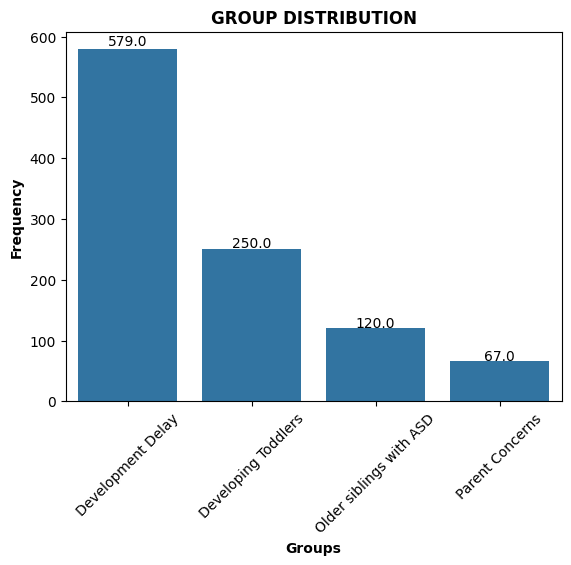

In [6]:
# Calculate the value counts for the 'group' column
val_count = data.group.value_counts()

# Display the index of the value counts
val_count.index

# Create a count plot for the 'group' column
# The 'order' parameter ensures the bars are displayed in the order of the value counts
group = sns.countplot(x=data["group"], data=data, order=val_count.index, color=color)

# Display the values on the bars
show_values(group)

# Set custom labels for the x-axis ticks
plt.gca().set_xticklabels(["Development Delay", "Developing Toddlers", "Older siblings with ASD", "Parent Concerns"])

# Rotate the x-axis labels by 45 degrees for better readability
plt.xticks(rotation=45)

# Set the title of the plot with bold font
plt.title("GROUP DISTRIBUTION", weight="bold")

# Set the y-axis label with bold font
plt.ylabel("Frequency", weight="bold")

# Set the x-axis label with bold font
plt.xlabel("Groups", weight="bold")

# Display the plot
plt.show()


The group column in the dataset categorizes participants into four distinct groups based on certain criteria. Among these groups, Developmental Delay (Group 4) exhibits the highest frequency, with a total count of 579 individuals. Following this, Developing Toddlers (Group 1) represents the second-highest count, comprising 250 individuals. The third-highest count is attributed to Older Siblings with ASD (Group 3), accounting for 120 individuals. Notably, the group with the lowest count is Parent Concerns (Group 2), with only 67 individuals falling into this category.

### Q_CHAT SCORE ANALYSIS

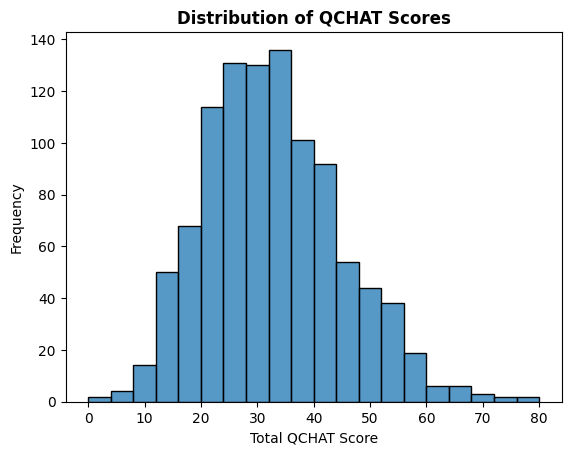

In [ ]:
# plots the univariate scores of the qchat scores
sns.histplot(data['sum_qchat'], bins=20)
plt.title('Distribution of QCHAT Scores', weight ="bold")
plt.xlabel('Total QCHAT Score')
plt.ylabel('Frequency')
plt.show()

These statistics offer insights into the distribution and central tendency of the Q-CHAT scores within the dataset. The mean score of approximately 32.27 indicates the average score across all participants, suggesting a moderate level of ASD-related behaviors among the sample. The standard deviation of approximately 12.14 reflects the dispersion or variability of scores around the mean. Additionally, the quartile values (25th, 50th, and 75th percentiles) provide information about the spread of scores and the central tendency within the dataset. Finally, the minimum and maximum values indicate the range of scores observed, with the lowest score being 0 and the highest being 80, suggesting variability in the severity of ASD-related behaviors among participants

## SCATTER PLOTS OF TOTAL Q_CHAT AND TARGET ASD RISK

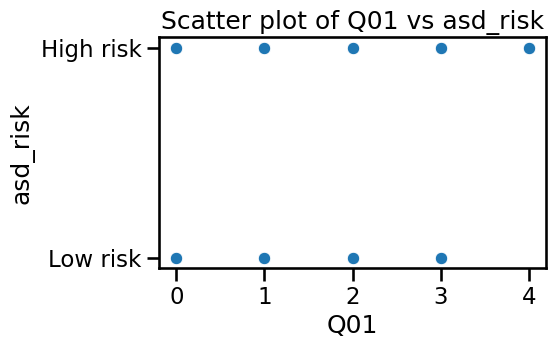

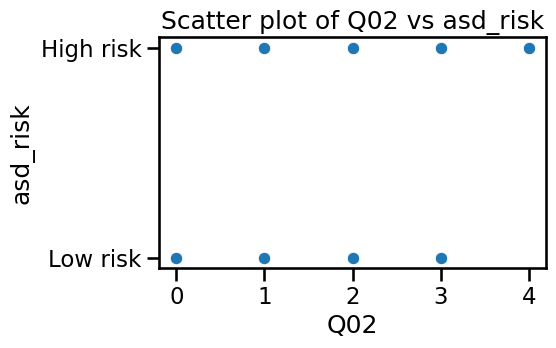

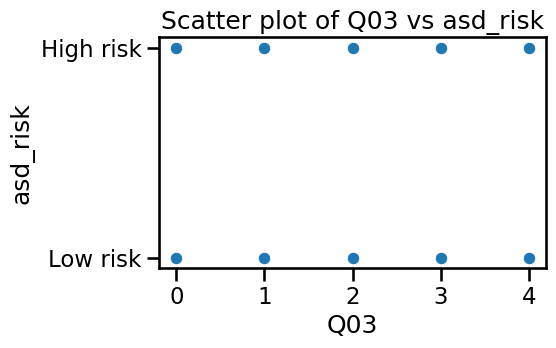

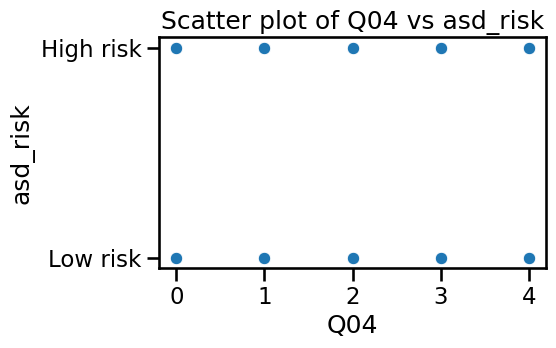

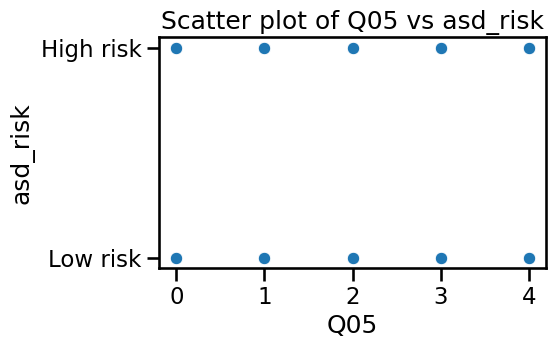

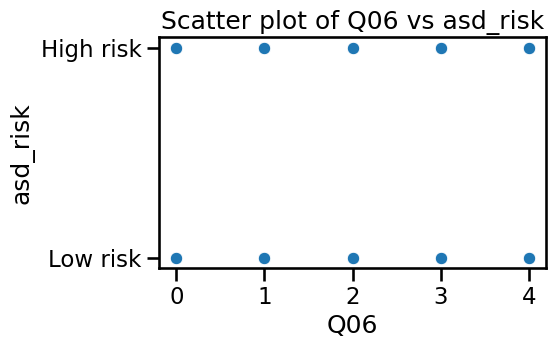

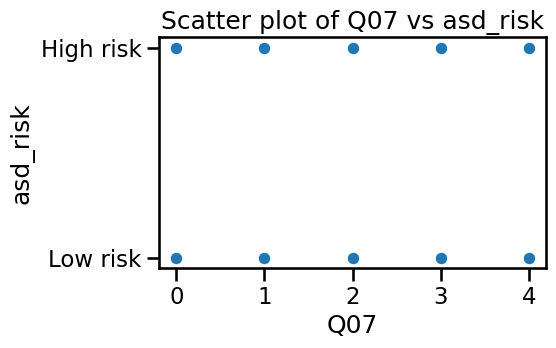

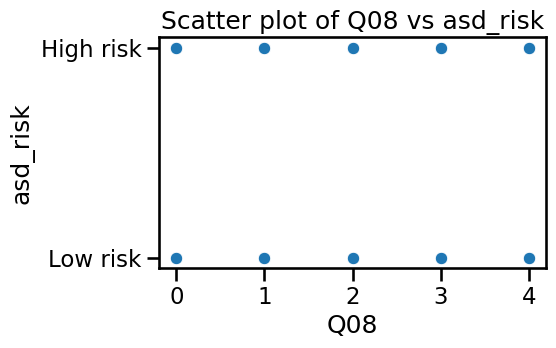

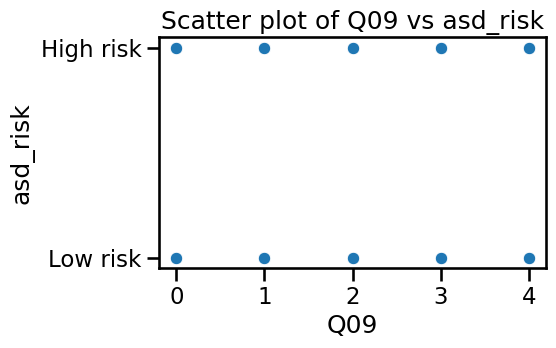

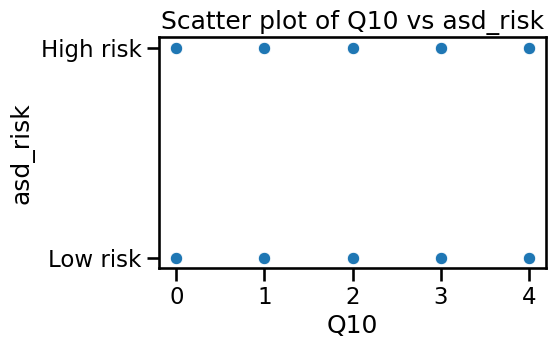

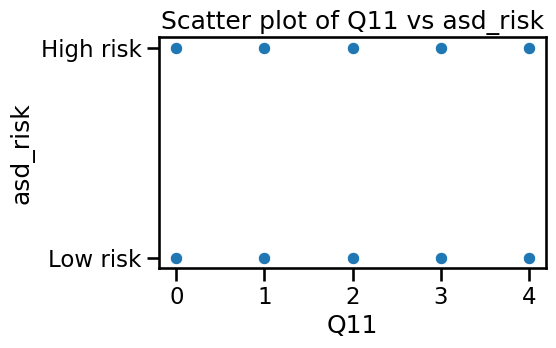

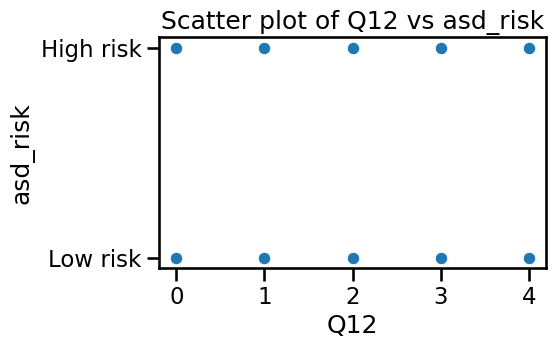

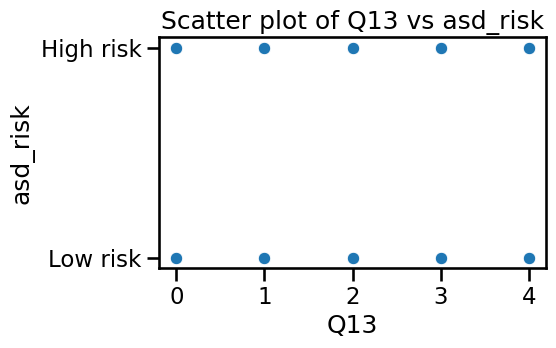

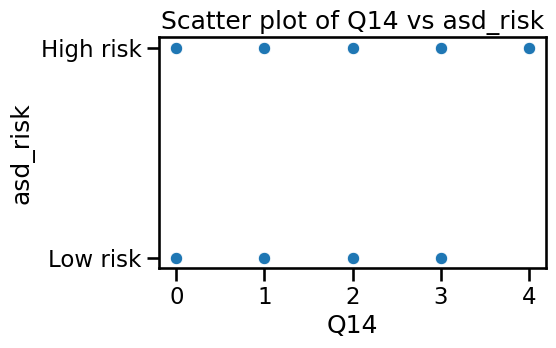

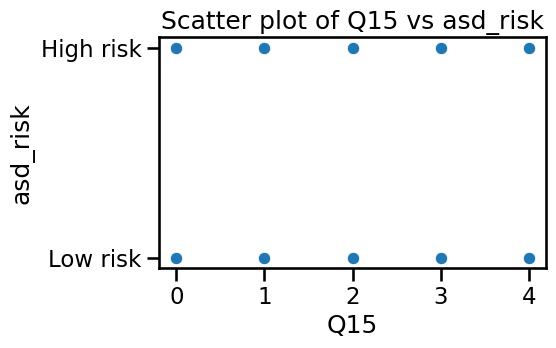

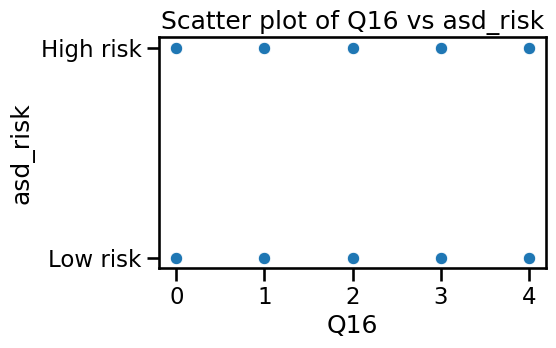

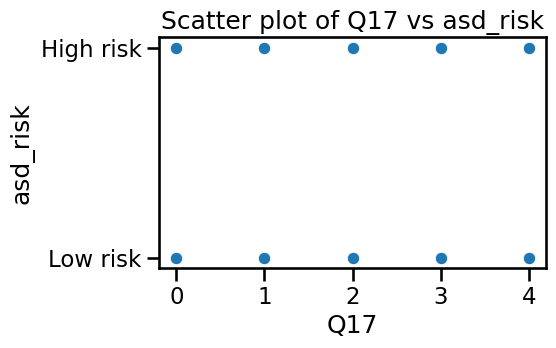

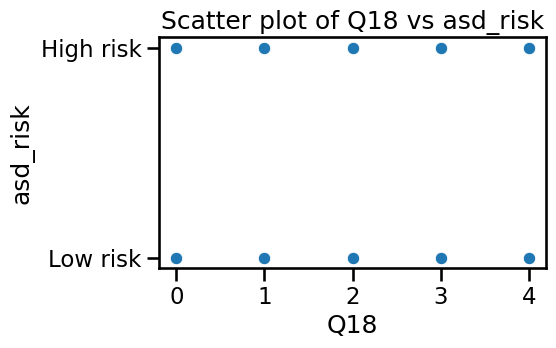

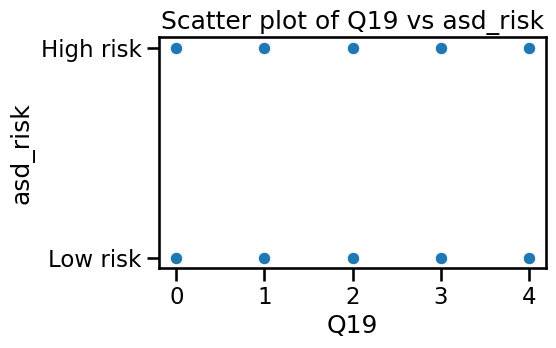

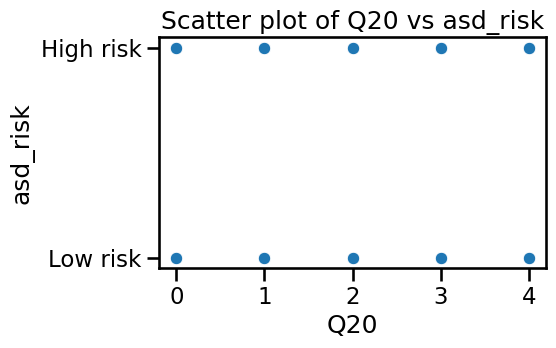

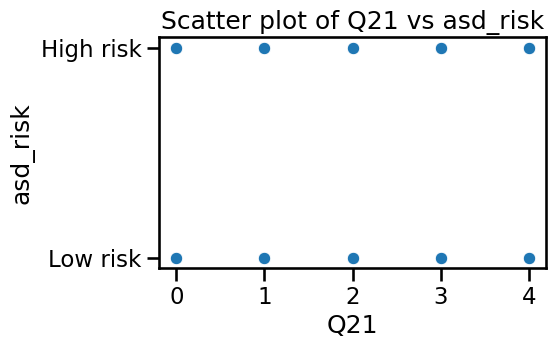

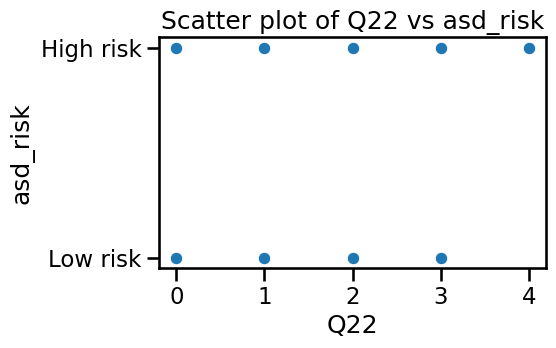

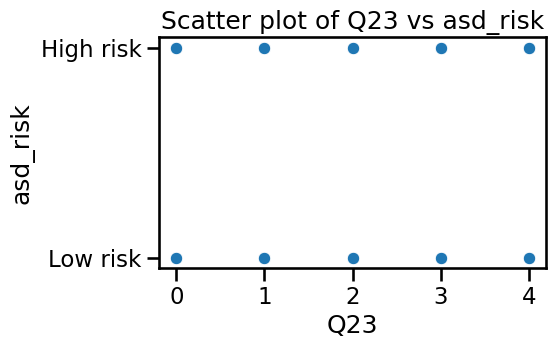

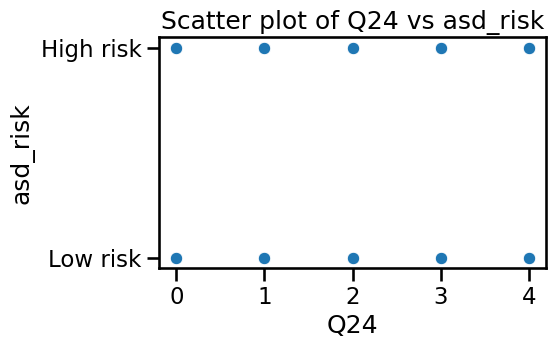

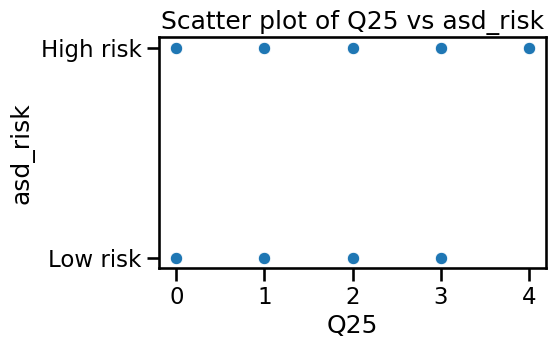

In [ ]:
# plots the scatter plot of the asd risk and the q1-25 chats
target = data.iloc[:, 4] # 5th column which is the asd risk column
features = data.iloc[:, 6:] # 7th column to the last

sns.set_context("talk")

for column in features.columns:
    plt.figure(figsize =(5, 3))
    sns.scatterplot(x=features[column], y=target)
    plt.title(f"Scatter plot of {column} vs {target.name}")
    plt.xlabel(column)
    plt.ylabel(target.name)
    plt.show()

The above scatter plot clearly indicates a situation where the plot and the data does not fit.

# MACHINE LEARNING

In [ ]:
# importing the necessary libraries
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve, auc
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

#### PREPROCESSING OF THE DATA

In [ ]:
# reading the data
dataset = pd.read_csv("C:/Users/Hp/Documents/Qchat_Full_Polish_Cleaned.csv")

In [ ]:
dataset.head(2)

child_ID  sex  age  group  asd_risk  sum_qchat  Q01  Q02  Q03  Q04  ...  \
0      288    1   24      1         1         37    2    2    1    0  ...   
1  FS/2510    2   23      1         1         37    2    1    0    4  ...   

   Q16  Q17  Q18  Q19  Q20  Q21  Q22  Q23  Q24  Q25  
0    1    4    1    4    4    0    0    0    0    3  
1    0    4    0    1    0    2    0    0    0    0  

[2 rows x 31 columns]

#### DROPPING REDUNDANT COLUMNS

In [ ]:
# drops the redundant column in the dataset
dataset = dataset.drop("child_ID", axis=1)

In this machine learning section, the target variable would be the asd risk. We need to determine if a patient is prone to ASD or not. Preprocessing the data includes encoding the dataset as our model only needs numerical values as input.

### DATA SPLITTING AND NORMALIZATION

In machine learning, data can be inputed in several magnitudes and sometimes it may hinder the model from learning some important data points or features correctly, with such a problem, the need to normalize or standardize our data becomes of utmost importance. Normalization is a technique used to transform the features of a dataset into a common scale, that is to represent the datapoints magnitude within a common range so that the machine learning is not influenced by the disproportional datapoints helping the data to converge faster and perform better.

In [ ]:
# separates the dependent and the independent variables
X = dataset.drop("asd_risk", axis = 1) #independent columns
y = dataset["asd_risk"] #target

In [ ]:
# splits the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=46)

### FEATURE SELECTION

Feature selection with respect to principal component analysis involves selecting a subset of features from a dataset that captures the most variance in the data. PCA itself does not perform feature selection but rather transforms the original features into a new set of uncorrelated variables called the principal components.

The code below is performing data standardization on a dataset. Standardization is a common preprocessing step in machine learning and statistical modeling that ensures that the data is on a common scale.

In [ ]:
# determining the best number for number of components
data_standard = (dataset - np.mean(dataset, axis=0)) / np.std(dataset, axis=0)

In [ ]:
data_standard.head()

sex       age     group  asd_risk  sum_qchat       Q01       Q02  \
0 -0.832666 -0.193837 -1.580658 -0.265708   0.390270  1.101492  1.394899   
1  1.200961 -0.390776 -1.580658 -0.265708   0.390270  1.101492  0.175263   
2 -0.832666 -1.375471 -1.580658 -0.265708   1.049754  1.101492  2.614535   
3 -0.832666 -0.981593 -1.580658 -0.265708   1.626803  3.353234  1.394899   
4  1.200961 -1.178532 -1.580658 -0.265708   0.555141 -0.024379  1.394899   

        Q03       Q04       Q05  ...       Q16       Q17       Q18       Q19  \
0 -0.665485 -1.187414 -0.065731  ... -0.488621  1.826792 -0.383483  2.120531   
1 -1.406046  1.707397  0.719950  ... -1.226272  1.826792 -1.148943 -0.164156   
2  1.556199  0.259992  0.719950  ...  0.249030  1.125348  0.381977  0.597406   
3 -1.406046  1.707397  2.291314  ...  0.986681 -0.277540 -1.148943  0.597406   
4 -0.665485 -0.463711  0.719950  ...  0.986681  1.826792  0.381977  0.597406   

        Q20       Q21       Q22       Q23       Q24       Q25  
0  2.289834 -0.980272 -1.150430 -0.884779 -1.102622  2.105428  
1 -0.750312  0.793471 -1.150430 -0.884779 -1.102622 -0.726586  
2 -0.750312 -0.980272 -1.150430 -0.884779 -1.102622 -0.726586  
3 -0.750312  0.793471 -1.150430  0.711910 -0.132696  1.161423  
4  0.009725 -0.980272 -0.180441  1.510254 -1.102622  1.161423  

[5 rows x 30 columns]

Principal Component Analysis (PCA) is a dimensionality reduction technique that transforms a large set of variables into a smaller one while retaining most of the original variability in the data. It is particularly useful in reducing the complexity of data and making it easier to visualize and analyze.

In [ ]:
# initializing the principal component analysis
pca = PCA()

In [ ]:
pca.fit(data_standard)

PCA()

In [ ]:
explained_variance = pca.explained_variance_ratio_

In [ ]:
components = range(1, len(explained_variance) + 1)

In [ ]:
pca_components = pca.components_

In [ ]:
# Displaying the shape
pca_components.shape

(30, 30)

## SCREE PLOT

This is a graphical method used after dimensionality reduction like PCA to visualize the amount of variance captured by each principal component. It displays the eigenvalues of the principal components in an order. This plot helps in determining the number of principal components to retain for further analysis based on zhe point where the eigenvalues start to level off, indicating diminishing returns in variance explained by additional factors or components.

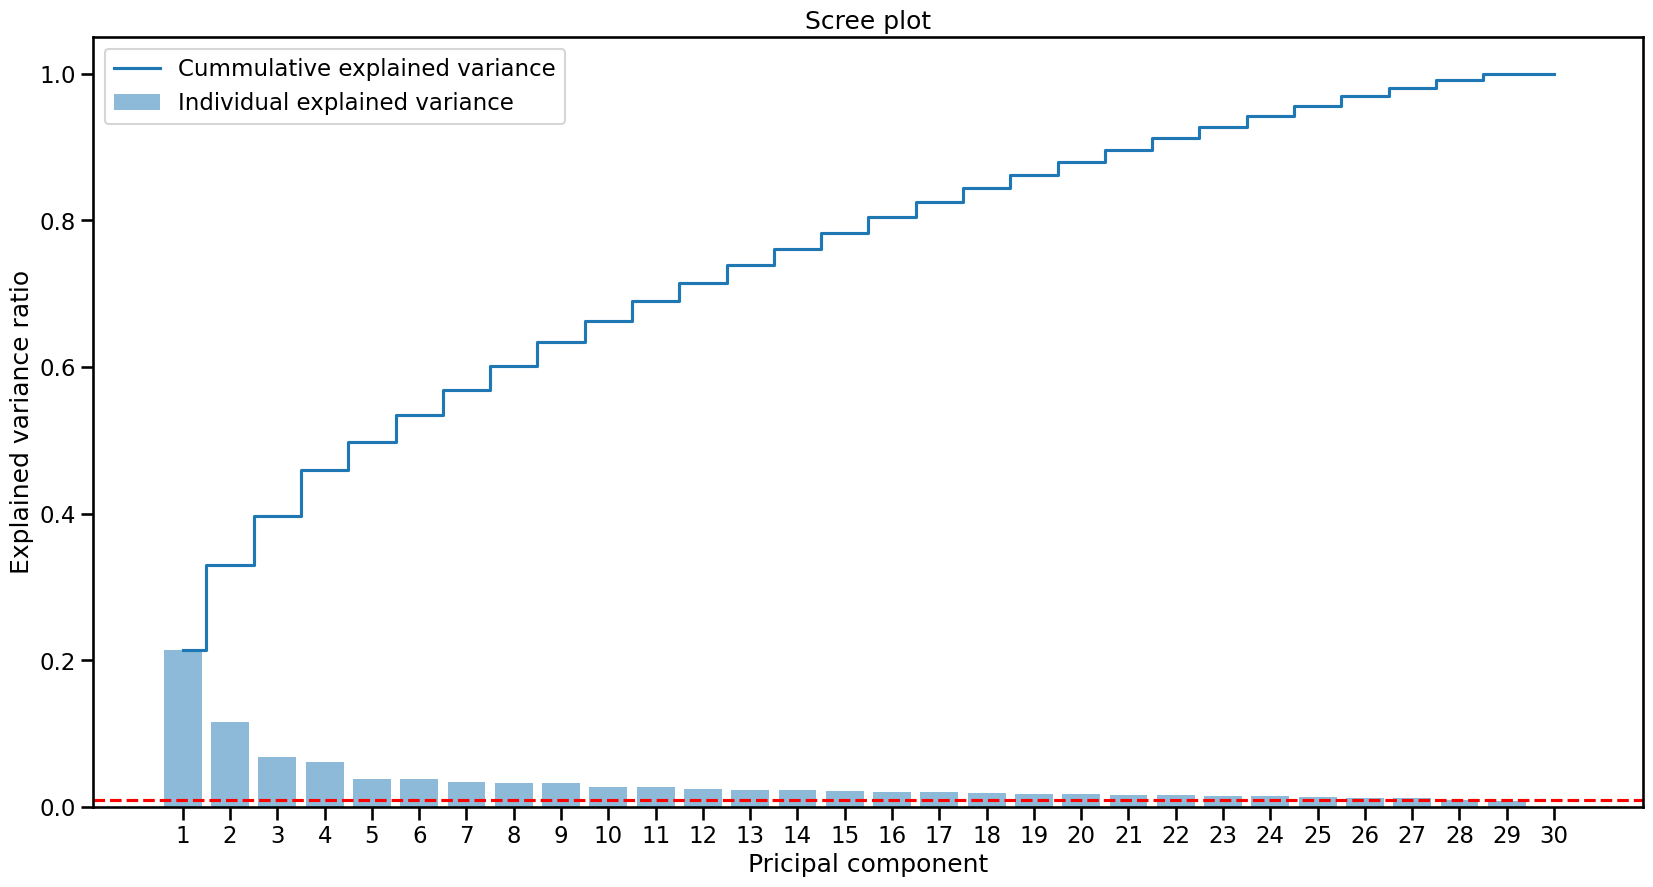

In [ ]:
# plotting the scree
plt.figure(figsize=(20, 10))
plt.bar(components, explained_variance, alpha=0.5, align="center", label="Individual explained variance")
plt.step(components, np.cumsum(explained_variance), where="mid", label="Cummulative explained variance")
plt.ylabel("Explained variance ratio")
plt.xlabel("Pricipal component")
plt.title("Scree plot")
plt.legend(loc="best")
plt.axhline(y=0.01, color="r", linestyle="--")
plt.xticks(components)
plt.show()

From the visualization above, the elbow can be seen to be on the 2nd principal component. The above scree plot is a graphical representation that is used to determine the number of retaining factors of a principal component. The above plot displays the eigenvalues of each factors in the principal component data. From the plot above, the elbow which is situated at the 2nd principal component gives the point where the eigenvalue levels off.

## CRONBACHS TEST

This is a test used to measure the internal covariance of a group of items, that is the internal consistency of a group. It quantifies correlation and in the project at hand, it measures the correlation of the items derived from the PCA. Theoritically, this test should give a number from 0 to 1, but getting a negative number is possible as well indicating a faulty data. A rtest score above 0.7 is a good score.

In [ ]:
# implementation of the formula for the cronbach test
def cronbach_alpha(df):
    N = df.shape[1]
    variances = df.var(axis=0)
    total_var = variances.sum()
    cov_matrix = df.cov()
    avg_cov = cov_matrix.sum().sum() / (N * (N - 1))
    alpha = (N * avg_cov) / (total_var + (N - 1) * avg_cov)
    return alpha

In [ ]:
value = cronbach_alpha(data_standard)

In [ ]:
print(f"Cronbachs Alpha : {value}")

Cronbachs Alpha : 0.1214633589482607


This is the cronbach score realized from the entire dataset. This score shows that the dataset's continuity is unreliable and inconsistent in the dataset hence the need for dimensionality reduction using principal component analysis.

## USING INTERPRETATIONS FROM PCA FOR CRONBACH

The code below uses PCA object to reduce the dataset to 2 principal components. PCA helps to simplify the dataset by transforming it into a set of orthogonal components that capture the maximum variance in the data, making it easier to visualize and potentially improving the performance of machine learning models.

In [ ]:
# specifying the n_components
pca =  PCA(n_components = 2)
column_pca = pca.fit_transform(data_standard)

In [ ]:
column_dataframe = pd.DataFrame(column_pca, columns = ["pc1", "pc2"])
column_dataframe

pc1       pc2
0     2.387557  0.254889
1     2.826793 -3.578218
2     4.016176 -2.313332
3     5.997417 -1.569818
4     2.184161  0.261303
...        ...       ...
1011  0.317732 -0.949976
1012 -0.618380  3.095198
1013  0.503983 -0.815198
1014 -3.398223  0.134853
1015 -0.890075 -1.422498

[1016 rows x 2 columns]

In the above, pc1 and pc2 are the first two principal components that capture the maximum variance in the dataset and represents the new reduced dimensional space axes. Each data point in the standard original dataset is represented by its coordinates along these two principal components pc1 and pc2. In essence, pc1 and pc2 are the reduced feature spaces of the entire dataset due to the principal component analysis. These two points indicate the proportion of the dataset's variance which is explained by each of the selected components.They are the eigen vectors corresponding to the selected principal components represented by a linear combination of the original feature. The dimension of the original dataset is (1016, 30) because originally a column, child ID was dropped and after the principal component analysis, it was reduced to (30, 30).

In [ ]:
pca_value = cronbach_alpha(column_dataframe)

In [ ]:
print(f"Cronbachs Alpha : {pca_value}")

Cronbachs Alpha : 0.666666666666667


This score of 0.6667 indicates moderate internal consistency reliability but since it can be approximated to 0.7 it is safe to assume the score is a good score. This also suggests that the items realized from the principal component analysis are somewhat related but may be improved for higher reliability.

### VIEWING THE GENERAL CLUSTER

The optimise_k_means function performs K-Means clustering for a range of cluster numbers and plots the resulting inertia values. This plot, known as the "elbow plot," helps to determine the optimal number of clusters by identifying the point where the inertia value starts to decrease more slowly, indicating that adding more clusters does not significantly improve the clustering quality.

In [ ]:
def optimise_k_means(data, max_k):
    # Lists to store the number of clusters and their corresponding inertia values
    means = []
    inertias = []

    # Loop over the range of cluster numbers from 1 to max_k (exclusive)
    for k in range(1, max_k):
        # Initialize the KMeans object with the current number of clusters
        kmeans = KMeans(n_clusters=k)
        # Fit the KMeans object to the data
        kmeans.fit(data)

        # Append the current number of clusters and its corresponding inertia to the lists
        means.append(k)
        inertias.append(kmeans.inertia_)

    # Create a figure for plotting
    fig = plt.subplots(figsize=(10, 5))
    # Plot the number of clusters (means) against the inertia values
    plt.plot(means, inertias, 'o-')
    # Label the x-axis as "Number of clusters"
    plt.xlabel("Number of clusters")
    # Label the y-axis as "Inertia"
    plt.ylabel("Inertia")
    # Enable the grid for the plot
    plt.grid(True)
    # Display the plot
    plt.show()

C:\Users\Hp\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


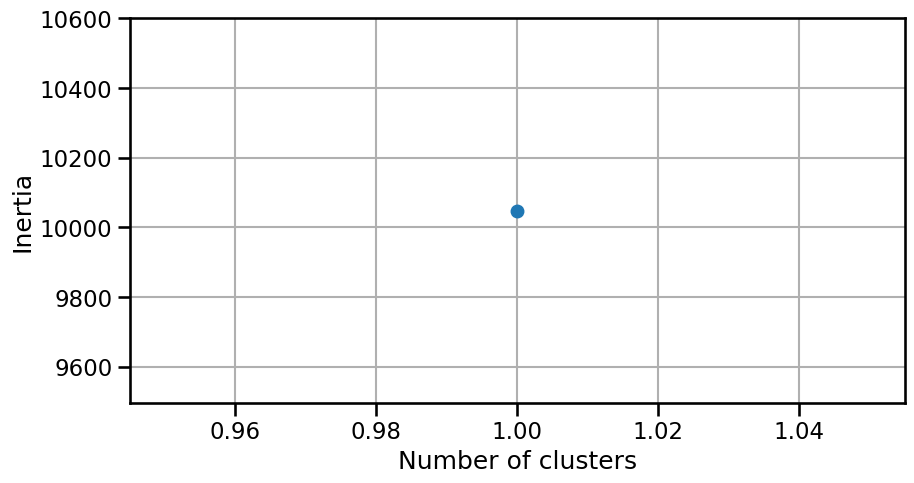

C:\Users\Hp\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


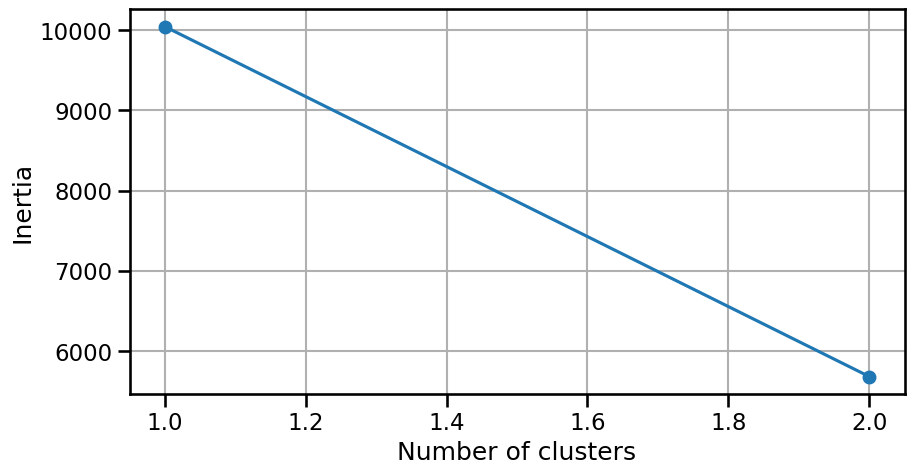

C:\Users\Hp\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


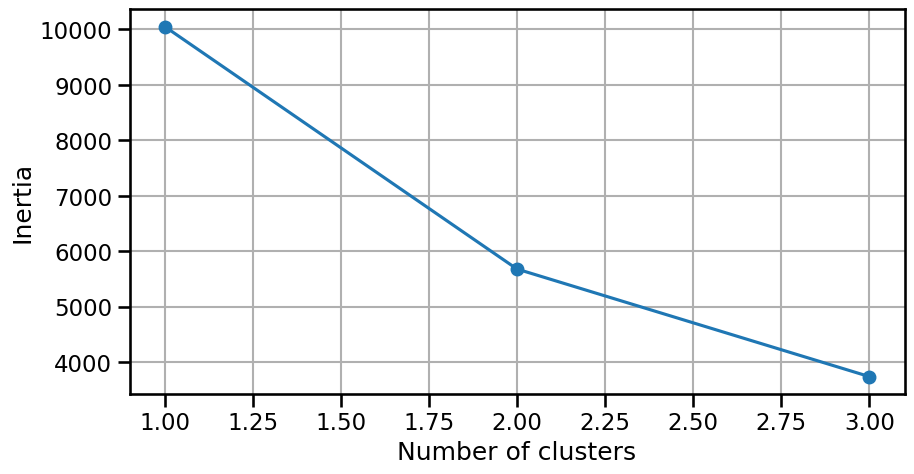

C:\Users\Hp\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


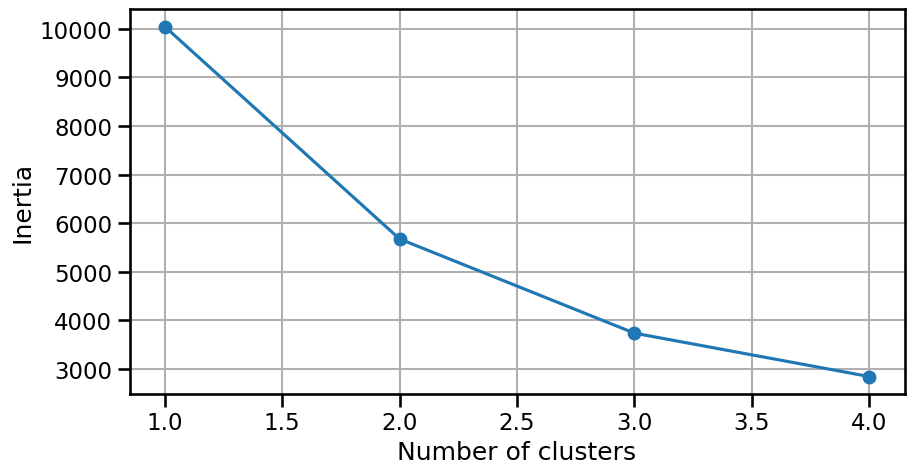

C:\Users\Hp\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


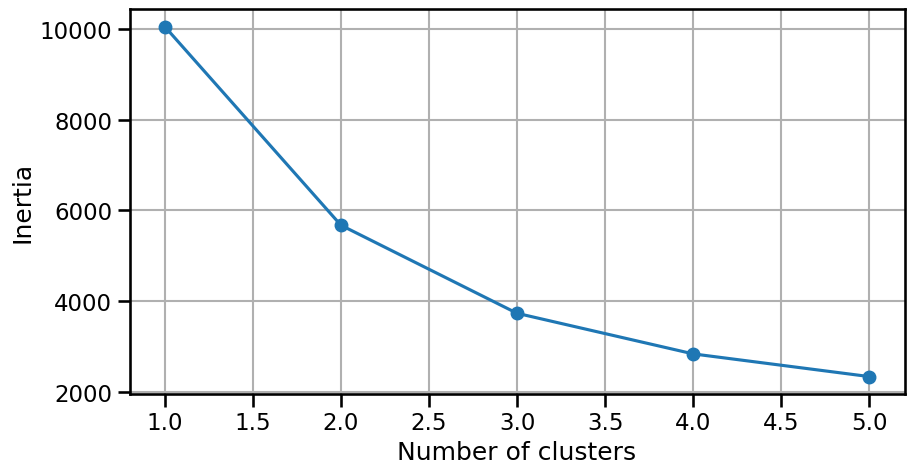

C:\Users\Hp\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


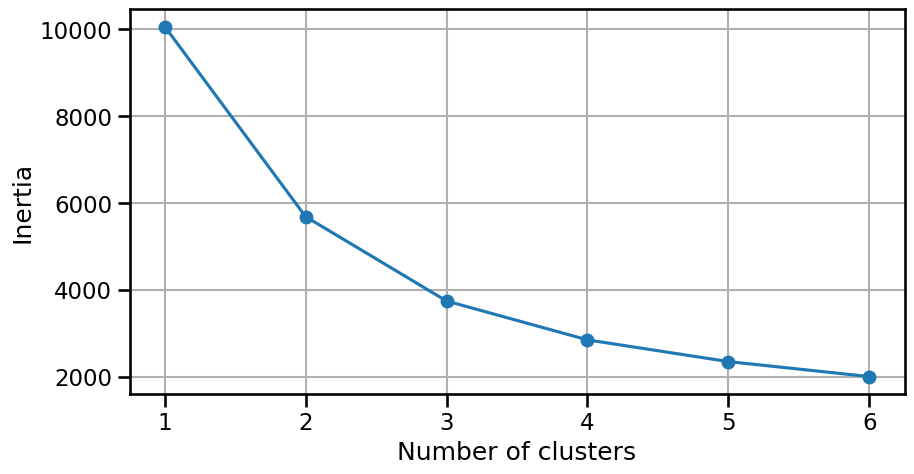

C:\Users\Hp\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


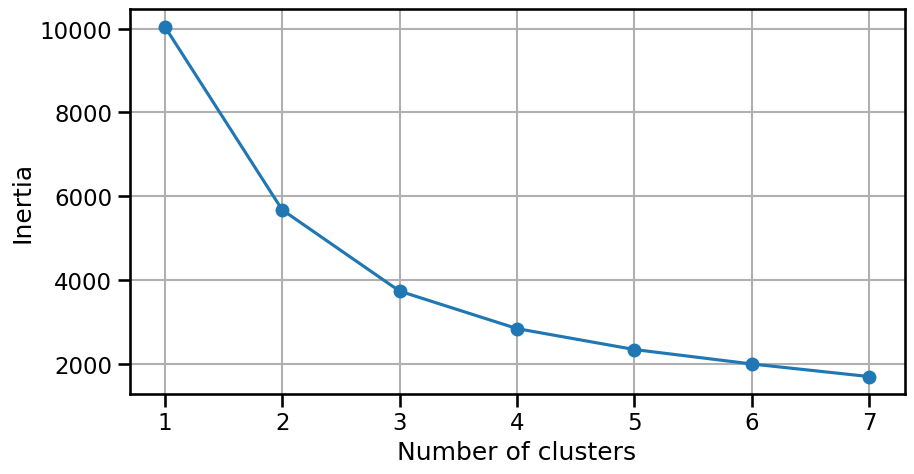

C:\Users\Hp\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


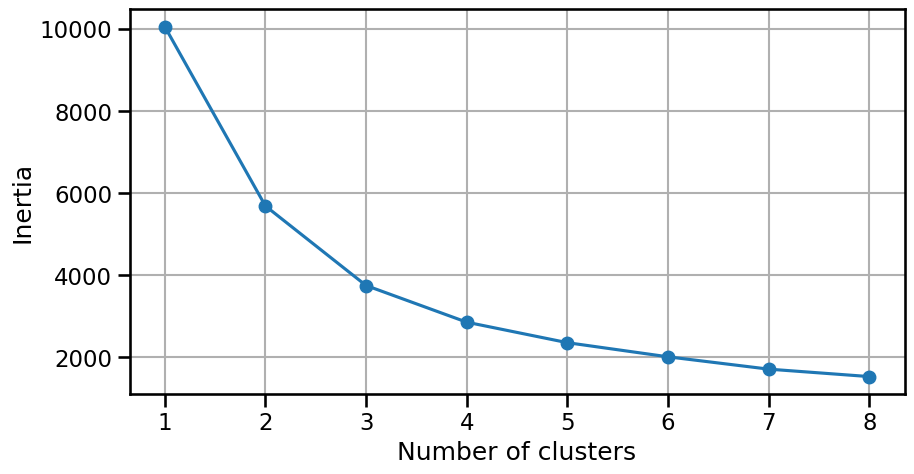

C:\Users\Hp\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


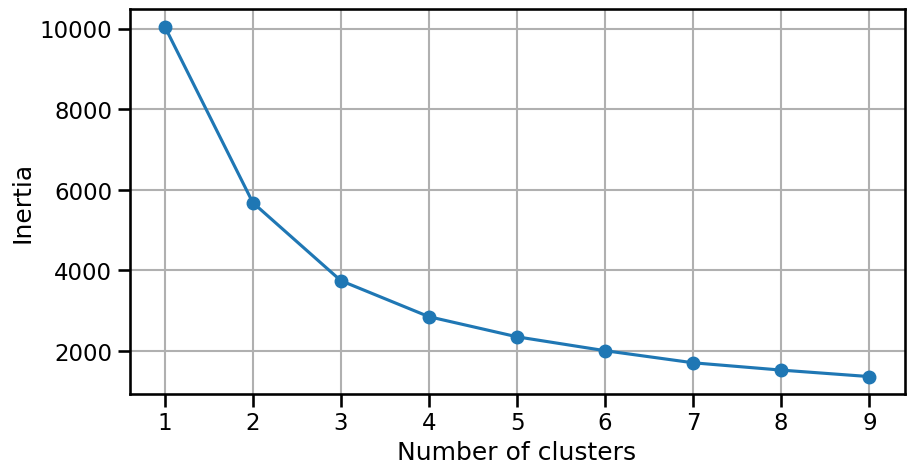

In [ ]:
# calling the elbow function
optimise_k_means(column_pca, 10)

The graph above shows the iteration of the kmeans when choosing the best number of clusters based on the optimal value determined by the elbow method.

This is a popular method of unsupervised learning used in clustering data points. The aim is to divide the points into a K cluster based on similarity where the value of K is a hyperparameter. This method works in an iterative format where the centroids of the clusters are updated until there is convergence in the algorithm. Firstly, the Centroids are initialised randomly then in which the algorithm assigns each data point to the nearest centroid then after the first iteration, the algorithm recalculates the centroids of the clusters and reassigns the data points to the nearest centroid. This process is repeated until the centroids no longer change, or there is convergence. The algorithm tries to minimize the sum of squared distances between each data point and its assigned centroid during each iteration. Once there is convergence, the best K would be used to cluster the given data points.

In [ ]:
# initialize the kmeans
kmeans = KMeans(n_clusters = 3)

In [ ]:
kmeans.fit(column_pca)

C:\Users\Hp\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [ ]:
column_dataframe["kmeans"] = kmeans.labels_
column_dataframe

pc1       pc2  kmeans
0     2.387557  0.254889       2
1     2.826793 -3.578218       2
2     4.016176 -2.313332       2
3     5.997417 -1.569818       2
4     2.184161  0.261303       2
...        ...       ...     ...
1011  0.317732 -0.949976       0
1012 -0.618380  3.095198       1
1013  0.503983 -0.815198       0
1014 -3.398223  0.134853       0
1015 -0.890075 -1.422498       0

[1016 rows x 3 columns]

<Axes: xlabel='pc1', ylabel='pc2'>

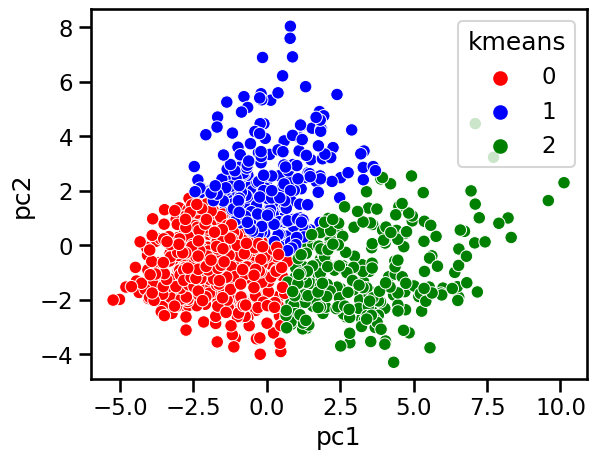

In [ ]:
# visualize the points
sns.scatterplot(data=column_dataframe, x="pc1", y="pc2", hue="kmeans", palette = ["r","b","g"])

The kmeans algorithm is a clustering technique that groups data point according to the number of clusters determined by the centroids in each cluster. This means that the data clusters have data which behave in a simiar way to the other data in the same group, just like a graphical representation of a cronbach's test. In the above, the items realized from the dimensionality reduction pc1 and pc2  which are the principal components was used to create clusters showing how each data point relate to each other.

# CROSS VALIDATION

Cross validation score is a strategy used when training a machine learning pipeline to assess the model's performance on previously unknown data. It works by dividing the dataset into subsets, training the model on part of them, and then evaluating it on the rest. This is done iteratively on each subset, yielding a robust estimate of how the model will generalize to previously unseen data.

# LOGISTIC REGRESSION

In [ ]:
# craete a pipeline with PCA and scaler
pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("pca", PCA(n_components=2)),
    ("classifier", LogisticRegression(random_state=46))
])

In [ ]:
# Define cross validation method
kfold = KFold(n_splits=5, shuffle=True, random_state=46)

In [ ]:
# perform cross validation
scores = cross_val_score(pipeline, X_train, y_train, cv=kfold)

In [ ]:
scores

array([0.92638037, 0.94478528, 0.89506173, 0.93209877, 0.96296296])

cross validation scores with several k fold for logistic regression

In [ ]:
# fit the pipeline on training data
pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('pca', PCA(n_components=2)),
                ('classifier', LogisticRegression(random_state=46))])

In [ ]:
# Test set evaluation
accuracy = pipeline.score(X_test, y_test)

In [ ]:
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 94.12%


In [ ]:
# make predictions
y_pred = pipeline.predict(X_test)

In [ ]:
# print the classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           1       0.94      1.00      0.97       192
           2       0.00      0.00      0.00        12

    accuracy                           0.94       204
   macro avg       0.47      0.50      0.48       204
weighted avg       0.89      0.94      0.91       204



C:\Users\Hp\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Hp\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Hp\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
class_labels = ["Yes", "No"]

### CONFUSION MATRIX

A confusion matrix is a table used to describe the performance of a classification method. A confusion matrix depicts and summarizes the performance of a classification algorithm.

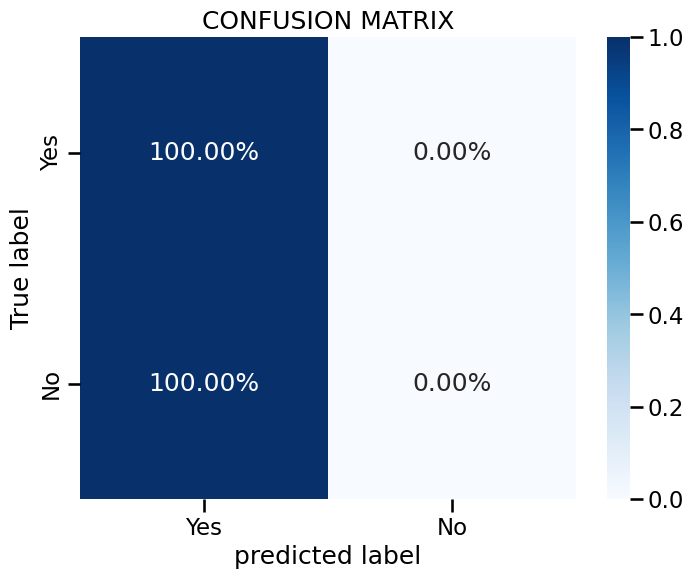

In [ ]:
# CREATE A CONFUSION MATRIX
c_matrix = confusion_matrix(y_test, y_pred)

# Convert the confusion matrix to percentages
c_matrix_percentage = c_matrix.astype("float") / c_matrix.sum(axis=1)[:, np.newaxis]

# Create a figure for the heatmap
plt.figure(figsize=(8, 6))

# Generate a heatmap from the percentage confusion matrix
sns.heatmap(c_matrix_percentage, annot=True, cmap="Blues", fmt=".2%", cbar=True, xticklabels=class_labels, yticklabels=class_labels)

# Add a title to the heatmap
plt.title("Confusion Matrix")

# Label the x-axis as 'predicted label'
plt.xlabel("Predicted Label")

# Label the y-axis as 'True Label'
plt.ylabel("True Label")

# Display the heatmap
plt.show()

A confusion matrix is a performance measurement tool used for evaluating the strenght of a machine learning model. It is usually divided into four quadrants where the first quadrant is the True positive (TP), the second quadrant is the False Positive (FP), the third quadrant is the False Negative (FN) and the fourth, the True Negative (TN).

- From the above matrix, the true positive is 100.0% indicating the number of cases the model corectly predicts the positive class. It shows the successful predictions.
- The false negative of this model is 100.0%, and it represents the cases where the model incorrectly predicts the negative classes when it is actually a positive class.
- The false positive above is 0.0% represents the total number of times the model incorrectly predicts the positive class when it was actually the negative class.
- The true negative quadrant which was 0.0% shows where the model correctly predicts the negative class. IT is the representation of the accurate negative predictions.

# RANDOM FOREST CLASSIFIER

In [ ]:
# craete a pipeline with PCA and scaler
pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("pca", PCA(n_components=2)),
    ("classifier", RandomForestClassifier(n_estimators=300, random_state=46, max_depth=10))
])

In [ ]:
# Define cross validation method
kfold = KFold(n_splits=5, shuffle=True, random_state=46)

In [ ]:
# perform cross validation
scores = cross_val_score(pipeline, X_train, y_train, cv=kfold)

In [ ]:
scores

array([0.9202454 , 0.93865031, 0.89506173, 0.93209877, 0.96296296])

cross validation scores with several k fold for random forest

In [ ]:
# fit the pipeline on training data
pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('pca', PCA(n_components=2)),
                ('classifier',
                 RandomForestClassifier(max_depth=10, n_estimators=300,
                                        random_state=46))])

In [ ]:
# make predictions
y_pred = pipeline.predict(X_test)

In [ ]:
# Test set evaluation
accuracy = pipeline.score(X_test, y_test)

In [ ]:
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 92.16%


In [ ]:
# print the classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           1       0.94      0.98      0.96       192
           2       0.00      0.00      0.00        12

    accuracy                           0.92       204
   macro avg       0.47      0.49      0.48       204
weighted avg       0.88      0.92      0.90       204



The code below generates and visualizes a normalized confusion matrix using a heatmap. The normalized confusion matrix shows the proportion of correct and incorrect predictions for each class, making it easier to evaluate the performance of a classification model. The heatmap provides a visual representation of this information, with annotations displaying the percentage values for each cell.

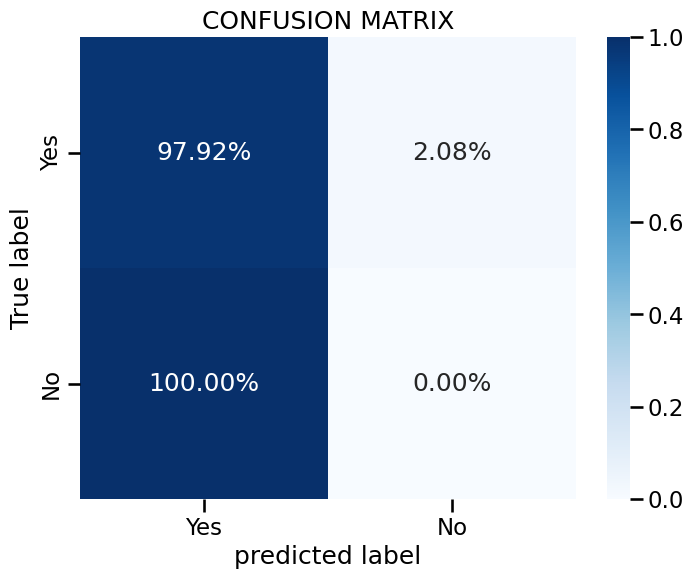

In [ ]:
# Calculate the confusion matrix
c_matrix = confusion_matrix(y_test, y_pred)

# Convert the confusion matrix to percentages
c_matrix_percentage = c_matrix.astype("float") / c_matrix.sum(axis=1)[:, np.newaxis]

# Create a figure with specified size for the heatmap
plt.figure(figsize=(8, 6))

# Generate a heatmap from the percentage confusion matrix
sns.heatmap(c_matrix_percentage, annot=True, cmap="Blues", fmt=".2%", cbar=True, xticklabels=class_labels, yticklabels=class_labels)

# Add a title to the heatmap
plt.title("Confusion Matrix")

# Label the x-axis as 'Predicted Label'
plt.xlabel("Predicted Label")

# Label the y-axis as 'True Label'
plt.ylabel("True Label")

# Display the heatmap
plt.show()

- From the above matrix, the true positive is 97.92% indicating the number of cases the model corectly predicts the positive class. It shows the successful predictions.
- The false negative of this model is 100.0%, and it represents the cases where the model incorrectly predicts the negative classes when it is actually a positive class.
- The false positive above is 2.08% represents the total number of times the model incorrectly predicts the positive class when it was actually the negative class.
- The true negative quadrant which was 0.0% shows where the model correctly predicts the negative class. IT is the representation of the accurate negative predictions.

## DECISION TREES

In [ ]:
# craete a pipeline with PCA and scaler
pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("pca", PCA(n_components=2)),
    ("decision_tree", DecisionTreeClassifier())
])

In [ ]:
# Define cross validation method
kfold = KFold(n_splits=5, shuffle=True, random_state=46)

In [ ]:
# perform cross validation
scores = cross_val_score(pipeline, X_train, y_train, cv=kfold)

In [ ]:
scores

array([0.88957055, 0.86503067, 0.85802469, 0.86419753, 0.91358025])

cross validation scores with several k fold for decision tree

In [ ]:
# fit the pipeline on training data
pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('pca', PCA(n_components=2)),
                ('decision_tree', DecisionTreeClassifier())])

In [ ]:
# Test set evaluation
accuracy = pipeline.score(X_test, y_test)

In [ ]:
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 82.35%


In [ ]:
# make predictions
y_pred = pipeline.predict(X_test)

In [ ]:
# print the classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           1       0.93      0.88      0.90       192
           2       0.00      0.00      0.00        12

    accuracy                           0.82       204
   macro avg       0.47      0.44      0.45       204
weighted avg       0.88      0.82      0.85       204



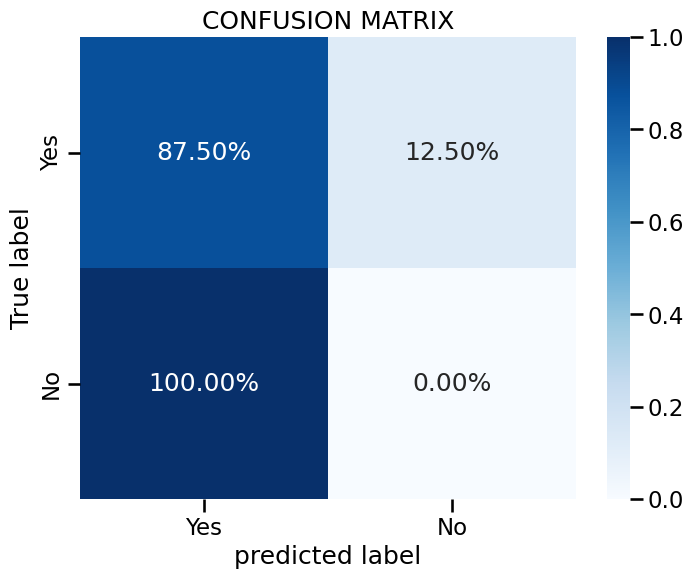

In [ ]:
# Calculate the confusion matrix
c_matrix = confusion_matrix(y_test, y_pred)

# Convert the confusion matrix to percentages
c_matrix_percentage = c_matrix.astype("float") / c_matrix.sum(axis=1)[:, np.newaxis]

# Create a figure with specified size for the heatmap
plt.figure(figsize=(8, 6))

# Generate a heatmap from the percentage confusion matrix
sns.heatmap(c_matrix_percentage, annot=True, cmap="Blues", fmt=".2%", cbar=True, xticklabels=class_labels, yticklabels=class_labels)

# Add a title to the heatmap
plt.title("Confusion Matrix")

# Label the x-axis as 'Predicted Label'
plt.xlabel("Predicted Label")

# Label the y-axis as 'True Label'
plt.ylabel("True Label")

# Display the heatmap
plt.show()

- From the above matrix, the true positive is 87.50% indicating the number of cases the model corectly predicts the positive class. It shows the successful predictions.
- The false negative of this model is 100.0%, and it represents the cases where the model incorrectly predicts the negative classes when it is actually a positive class.
- The false positive above is 12.50% represents the total number of times the model incorrectly predicts the positive class when it was actually the negative class.
- The true negative quadrant which was 0.0% shows where the model correctly predicts the negative class. IT is the representation of the accurate negative predictions.

# SUMMARY

#### WHAT FEATURES CONTRIBUTE THE MOST TO ASD

- From the correlation matrix, the Q22 and Q25 chat has more correlation to the asd risk positively with scores 0.3 and 0.25 respectively.
- Talking about the correlation between the chats which led to the determination of the spectrum, Q2 and Q1, Q5 and Q1, Q5 and Q2, Q6 and Q5 has scores 0.67, 0.47, 0.46 and 0.62 respectively so its safe to say they contribute to ASD more.
- The Logistic regression performed better with an accuracy of 94.12%.